<a href="https://colab.research.google.com/github/vforjj/AI-ML-Review/blob/main/PROC_%EB%AC%B8%EC%A0%9C50%EC%A2%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

# ▶ 경로 설정
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/00.Fast_campus/04.ML_signature/PROC/data')
# '과제 파일이 위치한 경로를 입력'
os.getcwd()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/Colab Notebooks/00.Fast_campus/04.ML_signature/PROC/data'

# **01. PROC 문제**  
---

#**┗ ✅ 숫자형 & 문자형 변수 구분**

## **🔒문제설명**
---
* **주어진 데이터를 Read하고, 숫자형 변수와 문자형 변수의 COl으로 나누시오**

> **출력형태**

```
* 숫자형 변수 : ['col1', 'col2', ...]
* 문자형 변수 : ['col3', 'col4', ...]
```


In [ ]:
# ▶ Data read  (※ 추가 수정 없이, 상위 단계에서 경로 설정 후 실행)
import pandas as pd
import numpy as np
df = pd.read_csv('exam01.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## **🔑풀이설명**
---
> **문제풀이**



In [ ]:
import numpy as np
import pandas as pd
# ▶ numeric, categorical value 나누기
numerical_list=[] # 숫자형 변수를 담아두기 위한 빈 List 생성
categorical_list=[] # 문자형 변수를 담다주기 위한 빈 List 생성

for i in df.columns : # for문을 활용하여 DataFrame에 있는 Col(컬럼) list들을 하나씩 루프(loop)를 수행함
  if df[i].dtypes == 'O' : # dtypes == 'O'라는 말은 'Object'의 줄임말로서 자료형 형태(문자형)를 나타냄
    categorical_list.append(i) # 상위 if문 조건에서 Col의 타입이 자료형인 경우에는 문자형 변수 List에 해당 내용을 추가함
  else :
    numerical_list.append(i) # 그렇지 않은 경우 숫자형 변수 List에 루프(loop)를 돌고있는 col 명을 추가함


print("숫자형 변수:", numerical_list) # 최종적으로 숫자형 변수 List를 출력
print("문자형 변수:", categorical_list) # 최종적으로 문자형 변수 List를 출력

숫자형 변수: ['Quantity', 'UnitPrice', 'CustomerID']
문자형 변수: ['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Country']


# **02. PROC 문제**  
---

#**┗ ✅ Pivot_table 활용**

## **🔒문제설명**
---
* **주어진 데이터를 Read하고, pd.pivot_table기능을 활용하여 년월 기준으로 거래건수를 카운트 하시오**

> **출력형태**

```
* index : 'InvoiceDate' Column을 활용하여 년도와 월을 추출
* 추출한 index를 활용하여 InvoiceNo Col(열)에 대해 Count 수행
```


In [ ]:
# ▶ Data read  (※ 추가 수정 없이, 상위 단계에서 경로 설정 후 실행)
import pandas as pd
import numpy as np
df = pd.read_csv('exam01.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## **🔑풀이설명**
---
> **문제풀이**



In [ ]:
# ▶ 년월을 추출하기 위해 pd.to_datetime 명령어를 통해 InvoiceDate 컬럼을 시간형태 데이터 타입으로 변환
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate'] = df['InvoiceDate'].dt.strftime("%Y-%m") # 시간형태 데이터 타입에 적용할 수 있는 .dt.strftiem(포맷변경)를 적용하여 년월을 추출
df['InvoiceDate'].head()

0    2010-12
1    2010-12
2    2010-12
3    2010-12
4    2010-12
Name: InvoiceDate, dtype: object

In [ ]:
# ▶ 새로 추출한 InvoiceDate를 index에 넣고, InvoiceNo를 Count함
df.pivot_table(index=['InvoiceDate'], values=['InvoiceNo'], aggfunc= 'count')

,InvoiceNo
InvoiceDate,
2010-12,42481
2011-01,35147
2011-02,27707
2011-03,36748
2011-04,29916
2011-05,37030
2011-06,36874
2011-07,39518
2011-08,35284


# **03. PROC 문제**  
---

#**┗ ✅ Encoding 변환**

## **🔒문제설명**
---
* **주어진 Data를 Read하고, label-encoding을 활용하여 문자형 변수를 Encoding하시오**

> **출력형태**

```
* from sklearn.preprocessing import LabelEncoder 활용
* 문자형 변수 모두 변환
```


In [ ]:
# ▶ Data read  (※ 추가 수정 없이, 상위 단계에서 경로 설정 후 실행)
import pandas as pd
import numpy as np
df = pd.read_csv('exam01.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## **🔑풀이설명**
---
> **문제풀이**



In [ ]:
import numpy as np
import pandas as pd
# ▶ numeric, categorical value 나누기
numerical_list=[] # 숫자형 변수를 담아두기 위한 빈 List 생성
categorical_list=[] # 문자형 변수를 담다주기 위한 빈 List 생성

for i in df.columns : # for문을 활용하여 DataFrame에 있는 Col(컬럼) list들을 하나씩 루프(loop)를 수행함
  if df[i].dtypes == 'O' : # dtypes == 'O'라는 말은 'Object'의 줄임말로서 자료형 형태(문자형)를 나타냄
    categorical_list.append(i) # 상위 if문 조건에서 Col의 타입이 자료형인 경우에는 문자형 변수 List에 해당 내용을 추가함
  else :
    numerical_list.append(i) # 그렇지 않은 경우 숫자형 변수 List에 루프(loop)를 돌고있는 col 명을 추가함


print("숫자형 변수:", numerical_list) # 최종적으로 숫자형 변수 List를 출력
print("문자형 변수:", categorical_list) # 최종적으로 문자형 변수 List를 출력

숫자형 변수: ['Quantity', 'UnitPrice', 'CustomerID']
문자형 변수: ['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Country']


In [ ]:
from sklearn.preprocessing import LabelEncoder # LabelEncoder load

for col in categorical_list: # 이전 단계에서 구분한 Categorical_list를 활용하여 LabelEncoder에 문자형 변수를 각각 할당함
    print(col)
    le = LabelEncoder() # LabelEncoder 모델을 생성 (※ 학습전)
    le.fit(df[col]) # for문을 통해 전달받은 문자형 변수 List들에 대해서 학습(Fitting)
    df[col] = le.transform(df[col]) # transform 명령어를 통해, 기존 문자형 데이터를 수치형 데이터로 변환

df[categorical_list] # 최종적으로 변환한 categorical_list를 출력하고, 변환 결과를 확인

InvoiceNo
StockCode
Description
InvoiceDate
Country


,InvoiceNo,StockCode,Description,InvoiceDate,Country
0,0,3536,3918,6838,36
1,0,2794,3926,6838,36
2,0,3044,913,6838,36
3,0,2985,1910,6838,36
4,0,2984,2911,6838,36
...,...,...,...,...,...
541904,22060,1527,2379,9391,13
541905,22060,1803,743,9391,13
541906,22060,2145,749,9391,13
541907,22060,2146,748,9391,13


# **04. PROC 문제**  
---

#**┗ ✅ NaN Value 처리**

## **🔒문제설명**
---
* **주어진 Data를 Read하고, NaN Value를 처리하시오**

> **출력형태**

```
* 'CustomerID'기준으로 NaN일시 모두 Drop
```


In [ ]:
# ▶ Data read  (※ 추가 수정 없이, 상위 단계에서 경로 설정 후 실행)
import pandas as pd
import numpy as np
df = pd.read_csv('exam01.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## **🔑풀이설명**
---
> **문제풀이**



In [ ]:
# ▶ isnull() 명령어를 통해서 col별 Null 값을 True/False로 출력
df.isnull()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False


In [ ]:
# ▶ sum() 명령어를 추가로 실행하여, Col별 NaN 개수 출력
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# ▶ dropna 명령어를 통해서 'CustomerID' NaN 값이 들어있는 행기준(axis=0)으로 Drop
df = df.dropna(subset=['CustomerID'], axis=0)

In [ ]:
# ▶ 최종 NaN value 확인 이상 무
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

# **05. PROC 문제**  
---

#**┗ ✅ Zero Ratio 출력**

## **🔒문제설명**
---
* **주어진 Data를 Read하고, 숫자형 변수 col 대상으로 0에 비율을 확인하시오**

> **출력형태**

```
* 주어진 데이터에서 숫자형 변수 대상으로만 zero(0)에 비율을 계산하시오
* 숫자형 변수 Col별로 %로 표현되어야함
```


In [ ]:
# ▶ Data read  (※ 추가 수정 없이, 상위 단계에서 경로 설정 후 실행)
import pandas as pd
import numpy as np
df = pd.read_csv('exam01.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## **🔑풀이설명**
---
> **문제풀이**



In [ ]:
import numpy as np
import pandas as pd
# ▶ numeric, categorical value 나누기
numerical_list=[] # 숫자형 변수를 담아두기 위한 빈 List 생성
categorical_list=[] # 문자형 변수를 담다주기 위한 빈 List 생성

for i in df.columns : # for문을 활용하여 DataFrame에 있는 Col(컬럼) list들을 하나씩 루프(loop)를 수행함
  if df[i].dtypes == 'O' : # dtypes == 'O'라는 말은 'Object'의 줄임말로서 자료형 형태(문자형)를 나타냄
    categorical_list.append(i) # 상위 if문 조건에서 Col의 타입이 자료형인 경우에는 문자형 변수 List에 해당 내용을 추가함
  else :
    numerical_list.append(i) # 그렇지 않은 경우 숫자형 변수 List에 루프(loop)를 돌고있는 col 명을 추가함


print("숫자형 변수:", numerical_list) # 최종적으로 숫자형 변수 List를 출력
print("문자형 변수:", categorical_list) # 최종적으로 문자형 변수 List를 출력

숫자형 변수: ['Quantity', 'UnitPrice', 'CustomerID']
문자형 변수: ['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Country']


In [ ]:
# ▶ numerical list 확인
df[numerical_list]

,Quantity,UnitPrice,CustomerID
0,6,2.55,17850.0
1,6,3.39,17850.0
2,8,2.75,17850.0
3,6,3.39,17850.0
4,6,3.39,17850.0
...,...,...,...
541904,12,0.85,12680.0
541905,6,2.10,12680.0
541906,4,4.15,12680.0
541907,4,4.15,12680.0


In [ ]:
len(df[df['UnitPrice'] == 0])

2515

In [ ]:
# ▶ Zero 비율 확인
list_of_df = [] # Zero 비율을 작성할 빈 List 생성

for i in numerical_list : # 상위 단계에서 구한 numerical_list를 하나씩 For문을 통과시킴
 loof_df = pd.DataFrame({'val' : [i],
                         'zero_cnt': len(df[df[i] == 0])}) # 각 val별 0인 값을 카운트하고, 변수명과 카운트수를 가지고 있는 DatFrame을 생성함
 list_of_df.append(loof_df) # 생성한 DataFrame을 처음 단계에서 생성한 빈 List에 append 시키면서 모든 Val에 대해서 실행

df_merge  = pd.concat(list_of_df).reset_index(drop=True) # 최종적으로 concat명령어를 사용하면 list들을 병합하여 하나의 DataFrame을 생성할 수 있음
df_merge['zero_ratio'] = df_merge['zero_cnt'] / len(df) # zero_cnt를 전체 데이터 개수로 나눠주게 되면 zero_ratio를 구할 수 있음
df_merge.sort_values(by=['zero_ratio'], ascending = False) # zero_ratio 기준으로 내림차순 정렬 후 코드 종료

,val,zero_cnt,zero_ratio
1,UnitPrice,2515,0.004641
0,Quantity,0,0.000000
2,CustomerID,0,0.000000


# **06. PROC 문제**  
---

#**┗ ✅ Data Type 재정의**

## **🔒문제설명**
---
* **주어진 Data를 Read하고, 잘 못 정의되어 있는 Col을 올바른 Type으로 재정의 하시오**

> **출력형태**

```
* CustomerID의 현재 Data type을 확인하고, 문자형(str, object) type으로 변경
* CustomerID를 소수점 아래에 단위는 버리고 숫자만 표현 ex) 17850.0 → 17850
* 변환 이전에 NA Value 00000으로 변경 후 진행
```


In [ ]:
# ▶ Data read  (※ 추가 수정 없이, 상위 단계에서 경로 설정 후 실행)
import pandas as pd
import numpy as np
df = pd.read_csv('exam01.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## **🔑풀이설명**
---
> **문제풀이**



In [ ]:
# ▶ dtype 명령어를 활용하여 CustomerID col의 현재 데이터 타입 확인
df['CustomerID'].dtype # float 타입으로 선언되어 있음

dtype('O')

In [ ]:
# ▶ CustomerID
df['CustomerID'].head() # 문자로 변환하기 전에 소수점으로 표현된 내용 삭제 필요

0    17850
1    17850
2    17850
3    17850
4    17850
Name: CustomerID, dtype: object

In [ ]:
# ▶ NaN Value가 존재하면 astype 명령어 실행 시 error가 발생하기 때문에, 사전에 NaN value처리가 필요함
df['CustomerID'] = df['CustomerID'].fillna(00000)

In [ ]:
# ▶ float type을 int형태로 변환하여 소수점 자리를 삭제하고, 다시 astype(str) 명령어를 통해 문자열 형태로 변환
df['CustomerID'] = df['CustomerID'].astype(int).astype(str)
df['CustomerID'].head()

0    17850
1    17850
2    17850
3    17850
4    17850
Name: CustomerID, dtype: object

# **07. PROC 문제**  
---

#**┗ ✅ 중복 데이터 처리**

## **🔒문제설명**
---
* **주어진 Data를 Read하고, 중복데이터를 처리하시오**

> **출력형태**

```
* 모든 Col을 기준으로 중복인 데이터를 삭제하고, 변경된 데이터 개수를 기존과 비교하여 출력하시오
```


In [ ]:
# ▶ Data read  (※ 추가 수정 없이, 상위 단계에서 경로 설정 후 실행)
import pandas as pd
import numpy as np
df = pd.read_csv('exam01.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## **🔑풀이설명**
---
> **문제풀이**



In [ ]:
# ▶ 중복된 데이터 개수 확인
df.duplicated().value_counts()

False    536641
True       5268
dtype: int64

In [ ]:
# ▶ duplicated(keep=False) 명령어를 활용하면, 모든 중복된 row에 대해서 True를 부여하므로 중복된 데이터를 직접 확인할 수 있음
df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom


In [ ]:
# ▶ drop_duplicates 명령어를 통해 모든 col이 중복되는 row를 삭제한다.
df_unique = df.drop_duplicates()

In [ ]:
# ▶ 중복 제거 전/후 개수 비교
len(df), len(df_unique)

(541909, 536641)

# **08. PROC 문제**  
---

#**┗ ✅ Outlier 처리**

## **🔒문제설명**
---
* **주어진 Data를 Read하고, 요청한 기준에 맞게 Outlier를 처리하시오**

> **출력형태**

```
* Quantity 및 UnitPrice는 음수값이 존재할 수 없음
```


In [ ]:
# ▶ Data read  (※ 추가 수정 없이, 상위 단계에서 경로 설정 후 실행)
import pandas as pd
import numpy as np
df = pd.read_csv('exam01.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## **🔑풀이설명**
---
> **문제풀이**



In [ ]:
# ▶ 문제가 되고 있는 Col에 분포를 파악하기 위해 describe() 명령어를 통해 확인
df['Quantity'].describe()

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [ ]:
# ▶ 문제가 되고 있는 Col에 분포를 파악하기 위해 describe() 명령어를 통해 확인
df['UnitPrice'].describe()

count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

In [ ]:
# ▶ 문제의 조건에 맞게 음수값을 제거하고 df를 다시 구성
df = df[df['Quantity']>0]
df = df[df['UnitPrice']>0]

In [ ]:
# ▶ 정상 변환 확인
df['Quantity'].describe()

count    530104.000000
mean         10.542037
std         155.524124
min           1.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [ ]:
# ▶ 정상 변환 확인
df['UnitPrice'].describe()

count    530104.000000
mean          3.907625
std          35.915681
min           0.001000
25%           1.250000
50%           2.080000
75%           4.130000
max       13541.330000
Name: UnitPrice, dtype: float64

# **09. PROC 문제**  
---

#**┗ ✅ 시간 데이터 활용 변수생성**

## **🔒문제설명**
---
* **주어진 Data를 Read하고, 시간 Type의 변수를 선언하고, 이를 활용하여 다양한 변수를 추출하시오**

> **출력형태**

```
* 대상 Col : InvoiceDate
* 추출 변수 : Month, Day, Hour
```


In [ ]:
# ▶ Data read  (※ 추가 수정 없이, 상위 단계에서 경로 설정 후 실행)
import pandas as pd
import numpy as np
df = pd.read_csv('exam01.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## **🔑풀이설명**
---
> **문제풀이**



In [ ]:
# ▶ InvoiceDate를 시간 Type으로 변환
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate'].info

<bound method Series.info of 0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 541909, dtype: datetime64[ns]>

In [ ]:
# ▶ dt.month/day/hour 명령어를 통해 문제에서 요구한 추가 변수 추출
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour

In [ ]:
# ▶ 최종 추출된 변수 확인
df[['InvoiceDate', 'Month', 'Day', 'Hour']]

,InvoiceDate,Month,Day,Hour
0,2010-12-01 08:26:00,12,1,8
1,2010-12-01 08:26:00,12,1,8
2,2010-12-01 08:26:00,12,1,8
3,2010-12-01 08:26:00,12,1,8
4,2010-12-01 08:26:00,12,1,8
...,...,...,...,...
541904,2011-12-09 12:50:00,12,9,12
541905,2011-12-09 12:50:00,12,9,12
541906,2011-12-09 12:50:00,12,9,12
541907,2011-12-09 12:50:00,12,9,12


# **10. PROC 문제**  
---

#**┗ ✅Unique Value 출력**

## **🔒문제설명**
---
* **주어진 Data를 Read하고, Col별 Unique한 Value를 추출하는 반복문을 만드시오**

> **출력형태**

```
* for문 활용 모든 Col의 Unique한 Value를 print
```


In [ ]:
# ▶ Data read  (※ 추가 수정 없이, 상위 단계에서 경로 설정 후 실행)
import pandas as pd
import numpy as np
df = pd.read_csv('exam01.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## **🔑풀이설명**
---
> **문제풀이**



In [ ]:
# ▶ for문 활용 df.columns list를 인자로 전달받아서, nunique() 명령어를 통해 Col별 Unique한 val를 출력
for i in df.columns :
  print(f'{i} / Unique val : {df[i].nunique()}')

InvoiceNo / Unique val : 25900
StockCode / Unique val : 4070
Description / Unique val : 4223
Quantity / Unique val : 722
InvoiceDate / Unique val : 23260
UnitPrice / Unique val : 1630
CustomerID / Unique val : 4372
Country / Unique val : 38


# **11. PROC 문제**  
---

#**┗ ✅연속형 변수 구간화(Binning)**

## **🔒문제설명**
---
* **주어진 Data를 Read하고, UnitPrice를 주어진 조건으로 가공 후, 구간화(binning) 하시오**

> **출력형태**

```
* UnitPrice > 0 조건 적용
* pd.cut 명령어를 활용하여 구간화 진행
* 구간화 : [0, 25%, 50%, 75%, max]
* 25% / 50% / 75% 구간은 describe() 명령어를 통해 계산
* 최종적으로 구간화한 내용을 기준으로 데이터를 카운트 수행
```


In [ ]:
# ▶ Data read  (※ 추가 수정 없이, 상위 단계에서 경로 설정 후 실행)
import pandas as pd
import numpy as np
df = pd.read_csv('exam01.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## **🔑풀이설명**
---
> **문제풀이**



In [ ]:
# ▶ UnitPrice 조건 적용
df = df[df['UnitPrice']>0]
df['UnitPrice'].describe()

count    539392.000000
mean          4.673648
std          94.614722
min           0.001000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

In [ ]:
# ▶ 상위 결과에서 [0, 25%, 50%, 75%, max] 값들을 활용하여, pd.cut 수행
df['UnitPrice_gp'] = pd.cut(df['UnitPrice'], [0, 1.25, 2.08, 4.13, 38970], labels= ['gp1', 'gp2', 'gp3', 'gp4'])
df.groupby('UnitPrice_gp')['InvoiceNo'].count()

UnitPrice_gp
gp1    164868
gp2    105106
gp3    140503
gp4    128915
Name: InvoiceNo, dtype: int64

# **12. PROC 문제**  
---

#**┗ ✅특정 조건 만족 데이터 추출(1)**

## **🔒문제설명**
---
* **주어진 Data를 Read하고, 아래 조건을 만족하는 데이터를 추출하시오**

> **출력형태**

```
* Quantity가 10이상이면서, 2010년 12월 1일에 결제한 모든 거래 데이터 추출
* 최종 추출된 데이터의 개수 출력
```


In [ ]:
# ▶ Data read  (※ 추가 수정 없이, 상위 단계에서 경로 설정 후 실행)
import pandas as pd
import numpy as np
df = pd.read_csv('exam01.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## **🔑풀이설명**
---
> **문제풀이**



In [ ]:
# ▶ InvoiceDate 시간 Type으로 변환 및 df.strftime 명령어를 통해 년월일 형식으로 변환
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['ymd'] = df['InvoiceDate'].dt.strftime("%Y%m%d")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,ymd
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,20101201
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20101201
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,20101201
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20101201
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20101201


In [ ]:
# ▶ '20101201' & Quantity > 10 조건에 맞는 데이터만을 추출
df[(df['Quantity'] > 10) & (df['ymd'] =='20101201')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,ymd
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,20101201
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,20101201
12,536367,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,8,2010-12-01 08:34:00,3.75,13047.0,United Kingdom,20101201
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France,20101201
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France,20101201
...,...,...,...,...,...,...,...,...,...
3045,536592,20728,LUNCH BAG CARS BLUE,9,2010-12-01 17:06:00,1.65,NaN,United Kingdom,20101201
3061,536594,84970L,SINGLE HEART ZINC T-LIGHT HOLDER,12,2010-12-01 17:22:00,0.95,15235.0,United Kingdom,20101201
3064,536595,21137,BLACK RECORD COVER FRAME,60,2010-12-01 17:24:00,3.39,13576.0,United Kingdom,20101201
3065,536595,22041,"RECORD FRAME 7"" SINGLE SIZE",24,2010-12-01 17:24:00,2.55,13576.0,United Kingdom,20101201


In [ ]:
# ▶ 최종 데이터 개수 확인
len(df[(df['Quantity'] > 10) & (df['ymd'] =='20101201')])

778

# **13. PROC 문제**  
---

#**┗ ✅특정 조건 만족 데이터 추출(2)**

## **🔒문제설명**
---
* **주어진 Data를 Read하고,다음 명령어를 사용하여 특정 조건에 맞는 데이터를 추출하시오**

> **출력형태**

```
* isin()과 notnull() 명령어를 사용할 것
* StockCode가 (84029E, 84406B, 85123A)를 포함하는 데이터
* CustomerID가 Null 값이 아닌 데이터
* 상위 2조건을 동시에 만족하는 데이터 추출
```


In [ ]:
# ▶ Data read  (※ 추가 수정 없이, 상위 단계에서 경로 설정 후 실행)
import pandas as pd
import numpy as np
df = pd.read_csv('exam01.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## **🔑풀이설명**
---
> **문제풀이**



In [ ]:
# ▶ 문제에서 요구한 Stockcode가 포함되어 있는 데이터 추출
df[df['StockCode'].isin(['84029E', '84406B', '85123A']) & df['CustomerID'].notnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
49,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 9:02,2.55,17850.0,United Kingdom
51,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 9:02,2.75,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
539979,581452,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,12/8/2011 18:03,2.55,17675.0,United Kingdom
540170,581469,84029E,RED WOOLLY HOTTIE WHITE HEART.,1,12/8/2011 19:28,4.25,14606.0,United Kingdom
540217,581472,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/8/2011 19:55,2.95,15796.0,United Kingdom
540393,581480,84029E,RED WOOLLY HOTTIE WHITE HEART.,8,12/9/2011 9:07,4.25,14441.0,United Kingdom


# **14. PROC 문제**  
---

#**┗ ✅apply-lambda 구문활용 데이터 처리**

## **🔒문제설명**
---
* **주어진 Data를 Read하고, apply-lambda 구문을 활용하여 데이터를 처리하시오**

> **출력형태**

```
* InvocieDate를 '/' 구분자 기준으로 Split하고, 년, 월, 일을 추출
* 추출한 년, 월, 일을 기존 데이터 프레임에 추가
```


In [ ]:
# ▶ Data read  (※ 추가 수정 없이, 상위 단계에서 경로 설정 후 실행)
import pandas as pd
import numpy as np
df = pd.read_csv('exam01.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## **🔑풀이설명**
---
> **문제풀이**



In [ ]:
# ▶ apply(lambda x:)명령어는 목표가 되는 타겟 X에 대해서 사용자 정의함수를 모두 실행함
# '/'구분자 기준으로 날짜를 분할하여 원하는 값들을 [n] 인자를 통해서 추출하고, str.slice를 통해 원하는 부분만 추가 추출 진행
df['month'] = df['InvoiceDate'].apply(lambda x: x.split('/')[0])
df['day'] = df['InvoiceDate'].apply(lambda x: x.split('/')[1])
df['year'] = df['InvoiceDate'].apply(lambda x: x.split('/')[2]).str.slice(0,4)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,day,year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,12,1,2010
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12,1,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,12,1,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12,1,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12,1,2010


# **15. PROC 문제**  
---

#**┗ ✅특정값 원하는 값으로 변환**

## **🔒문제설명**
---
* **주어진 Data를 Read하고, 특정값을 원하는 값으료 변환하시오**

> **출력형태**

```
* replace 명령어를 활용하여 데이터를 변환하시오
* Country Col의 'United Kingdom'을 'UK'로 치환하시오.
```


In [ ]:
# ▶ Data read  (※ 추가 수정 없이, 상위 단계에서 경로 설정 후 실행)
import pandas as pd
import numpy as np
df = pd.read_csv('exam01.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## **🔑풀이설명**
---
> **문제풀이**



In [ ]:
# ▶ value_counts() 명령어를 통해 국가별 count 정보를 확인
df['Country'].value_counts()

In [ ]:
# ▶ replace 명령어를 통해 기존 Data를 원하는 형태로 변경 진행
df['Country'] = df['Country'].replace('United Kingdom','UK')
df['Country'].value_counts()

UK                      495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

# **16. PROC 문제**  
---

#**┗ ✅집계(Groupby) 활용 데이터 처리**

## **🔒문제설명**
---
* **주어진 Data를 Read하고,집계(Groupby)명령어를 활용하여 조건에 만족하는 데이터를 추출하시오**

> **출력형태**

```
* Groupby 명령어를 활용할 것
* CustomerID 기준으로 모든 상품의 구매한 수량(Quantity)과 평균 수량(Quatity) 추출
```


In [ ]:
r# ▶ Data read  (※ 추가 수정 없이, 상위 단계에서 경로 설정 후 실행)
import pandas as pd
import numpy as np
df = pd.read_csv('exam01.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## **🔑풀이설명**
---
> **문제풀이**



In [ ]:
# ▶ .agg([])명령어를 사용하면 groupby 기준으로 여러가지 산술계산을 동시에 진행할 수 있음
df.groupby('CustomerID')['Quantity'].agg(['sum', 'mean'])

,sum,mean
CustomerID,,
12346.0,0,0.000000
12347.0,2458,13.505495
12348.0,2341,75.516129
12349.0,631,8.643836
12350.0,197,11.588235
...,...,...
18280.0,45,4.500000
18281.0,54,7.714286
18282.0,98,7.538462


# **17. PROC 문제**  
---

#**┗ ✅Min-Max 정규화**

## **🔒문제설명**
---
* **주어진 Data를 Read하고,Min-Max 정규화를 진행하시오.**

> **출력형태**

```
* from sklearn.preprocessing import minmax_scale 사용하여 정규화 진행
* Quantity Col에 대한 Min-Max 정규화 진행하고, describe()명령어 수행 및 확인
```


In [ ]:
# ▶ Data read  (※ 추가 수정 없이, 상위 단계에서 경로 설정 후 실행)
import pandas as pd
import numpy as np
df = pd.read_csv('exam01.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## **🔑풀이설명**
---
> **문제풀이**



In [ ]:
# ▶ minmax_scale 명령어를 통해 Quantity를 정규화함, axis=0으로 설정해줘야 row기준으로 표준화를 진행
from sklearn.preprocessing import minmax_scale
df['Quantity'] = minmax_scale(df['Quantity'], axis=0, copy=True)

In [ ]:
df['Quantity'].describe()

count    541909.000000
mean          0.500059
std           0.001346
min           0.000000
25%           0.500006
50%           0.500019
75%           0.500062
max           1.000000
Name: Quantity, dtype: float64

# **18. PROC 문제**  
---

#**┗ ✅지연(lag) 데이터 생성**

## **🔒문제설명**
---
* **주어진 Data를 Read하고,shift명령어를 활용하여 지연(lag)데이터를 생성하시오**

> **출력형태**

```
* CustomerID 17850.0에 데이터만 가져와 새로운 DF 생성
* DF에서 CustomerID, InvoiceDate Col만 남김
* 중복 제거
* 데이터를 구매시간 순으로 정렬
* Shift명령어를 통해 이전 거래 일자를 의미하는 새로운 Col을 생성
```


In [ ]:
# ▶ Data read  (※ 추가 수정 없이, 상위 단계에서 경로 설정 후 실행)
import pandas as pd
import numpy as np
df = pd.read_csv('exam01.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## **🔑풀이설명**
---
> **문제풀이**



In [ ]:
# ▶ 문제에서 요구한 CustomerID만 가져와서 데이터를 구성
DF = df[df['CustomerID'] == 17850.0]
DF = DF[['CustomerID','InvoiceDate']]
DF.head()

,CustomerID,InvoiceDate
0,17850.0,12/1/2010 8:26
1,17850.0,12/1/2010 8:26
2,17850.0,12/1/2010 8:26
3,17850.0,12/1/2010 8:26
4,17850.0,12/1/2010 8:26


In [ ]:
# ▶ drop_duplicates 명령어를 통해 중복 데이터 제거
DF = DF.drop_duplicates()
DF.head()

,CustomerID,InvoiceDate
0,17850.0,12/1/2010 8:26
7,17850.0,12/1/2010 8:28
47,17850.0,12/1/2010 9:01
49,17850.0,12/1/2010 9:02
66,17850.0,12/1/2010 9:32


In [ ]:
# ▶ 날짜 기준으로 정렬
DF = DF.sort_values(by=['InvoiceDate'])
DF.head()

,CustomerID,InvoiceDate
278,17850.0,12/1/2010 10:51
315,17850.0,12/1/2010 10:52
416,17850.0,12/1/2010 11:33
433,17850.0,12/1/2010 11:34
0,17850.0,12/1/2010 8:26


In [ ]:
# ▶ shift 명렬어를 통해 1개씩 데이터를 지연 시킴
DF['lag'] = DF['InvoiceDate'].shift(1)
DF.head()

,CustomerID,InvoiceDate,lag
278,17850.0,12/1/2010 10:51,None
315,17850.0,12/1/2010 10:52,12/1/2010 10:51
416,17850.0,12/1/2010 11:33,12/1/2010 10:52
433,17850.0,12/1/2010 11:34,12/1/2010 11:33
0,17850.0,12/1/2010 8:26,12/1/2010 11:34


# **19. PROC 문제**  
---

#**┗ ✅특정 데이터 유형의 칼럼을 선택**

## **🔒문제설명**
---
* **주어진 Data를 Read하고, 숫자형 데이터만 출력하시오**

> **출력형태**

```
* pd.DataFrame.select_dtypes(include=None) 명령어를 사용하여 숫자형 데이터만을 출력하시오
```


In [ ]:
# ▶ Data read  (※ 추가 수정 없이, 상위 단계에서 경로 설정 후 실행)
import pandas as pd
import numpy as np
df = pd.read_csv('exam01.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## **🔑풀이설명**
---
> **문제풀이**



In [ ]:
# ▶ select_dtypes(include='number')를 사용하면 숫자로 정의된 모든 COl을 식별할 수 있음
df.select_dtypes(include='number')

,Quantity,UnitPrice,CustomerID
0,6,2.55,17850.0
1,6,3.39,17850.0
2,8,2.75,17850.0
3,6,3.39,17850.0
4,6,3.39,17850.0
...,...,...,...
541904,12,0.85,12680.0
541905,6,2.10,12680.0
541906,4,4.15,12680.0
541907,4,4.15,12680.0


In [ ]:
# ▶ select_dtypes(exclude='object')를 사용하여 objcet 타입을 제외하고 모든 col을 식별
df.select_dtypes(exclude='object')

,Quantity,UnitPrice,CustomerID
0,6,2.55,17850.0
1,6,3.39,17850.0
2,8,2.75,17850.0
3,6,3.39,17850.0
4,6,3.39,17850.0
...,...,...,...
541904,12,0.85,12680.0
541905,6,2.10,12680.0
541906,4,4.15,12680.0
541907,4,4.15,12680.0


# **20. PROC 문제**  
---

#**┗ ✅특정 문자를 포함하는 행 가져오기**

## **🔒문제설명**
---
* **주어진 Data를 Read하고, str.contains 명령어를 활용하여 특정 문자를 포함하는 행을 출력하시오**

> **출력형태**

```
* .str.contains('', na=False)를 활용
* Description에 'BOTTLE'이 포함된 행을 출력
```


In [ ]:
# ▶ Data read  (※ 추가 수정 없이, 상위 단계에서 경로 설정 후 실행)
import pandas as pd
import numpy as np
df = pd.read_csv('exam01.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## **🔑풀이설명**
---
> **문제풀이**



In [ ]:
# ▶ .str.contains(na=False) 명령어를 사용해 원하는 조건에 해당하는 데이터 추출
# na=False는 na 데이터가 존재할 시 필수적으로 설정해야함
df[df['Description'].str.contains('BOTTLE', na=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
61,536373,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 9:02,3.39,17850.0,United Kingdom
78,536375,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 9:32,3.39,17850.0,United Kingdom
82,536376,22114,HOT WATER BOTTLE TEA AND SYMPATHY,48,12/1/2010 9:32,3.45,15291.0,United Kingdom
190,536388,22915,ASSORTED BOTTLE TOP MAGNETS,12,12/1/2010 9:59,0.42,16250.0,United Kingdom
...,...,...,...,...,...,...,...,...
541751,581572,23328,SET 6 SCHOOL MILK BOTTLES IN CRATE,48,12/9/2011 12:08,3.39,16705.0,United Kingdom
541870,581585,22915,ASSORTED BOTTLE TOP MAGNETS,24,12/9/2011 12:31,0.19,15804.0,United Kingdom
541877,581585,22113,GREY HEART HOT WATER BOTTLE,4,12/9/2011 12:31,4.25,15804.0,United Kingdom
541878,581585,23356,LOVE HOT WATER BOTTLE,3,12/9/2011 12:31,5.95,15804.0,United Kingdom


# **21. PROC 문제**  
---

#**┗ ✅%timeit 로 실행 시간 측정**

## **🔒문제설명**
---
* **주어진 Data를 Read하고,%timeit 로 실행 시간 측정하시오**

> **출력형태**

```
* 코드를 자유롭게 입력하고, %timeit 매직 명령어를 통해 수행시간을 측정
```


In [ ]:
# ▶ Data read  (※ 추가 수정 없이, 상위 단계에서 경로 설정 후 실행)
import pandas as pd
import numpy as np
df = pd.read_csv('exam01.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## **🔑풀이설명**
---
> **문제풀이**



In [ ]:
# ▶ 실행명령어 앞에 %timeit를 입력하면 수행된 시간을 확인할 수 있음
import timeit
%timeit df = pd.read_csv('exam01.csv', encoding='ISO-8859-1')
%timeit df.head()

1.03 s ± 185 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
19.2 µs ± 2.09 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


# **22. PROC 문제**  
---

#**┗ ✅Col 순서 변경하기**

## **🔒문제설명**
---
* **주어진 Data를 Read하고,주어진 조건에 맞게 Col 위치를 변경하시오**

> **출력형태**

```
* CustomerID를 맨 앞으로 배치할 것
```


In [ ]:
# ▶ Data read  (※ 추가 수정 없이, 상위 단계에서 경로 설정 후 실행)
import pandas as pd
import numpy as np
df = pd.read_csv('exam01.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## **🔑풀이설명**
---
> **문제풀이**



In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
# ▶ [[]] 대괄호 2번을 사용하고 col순서를 재정의하면 원하는 컬럼의 순서로 변경할 수 있음
df = df[['CustomerID', 'InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice','Country']]
df.head()

,CustomerID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,17850.0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,United Kingdom
1,17850.0,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,United Kingdom
2,17850.0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,United Kingdom
3,17850.0,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,United Kingdom
4,17850.0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,United Kingdom


# **23. PROC 문제**  
---

#**┗ ✅특정 Col 이름 변경하기**

## **🔒문제설명**
---
* **주어진 Data를 Read하고,아래 조건에 맞게 Col명을 변경하시오**

> **출력형태**

```
* rename 명령어를 사용하여 CustomerID를 CID로 변경할 것
```


In [ ]:
# ▶ Data read  (※ 추가 수정 없이, 상위 단계에서 경로 설정 후 실행)
import pandas as pd
import numpy as np
df = pd.read_csv('exam01.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## **🔑풀이설명**
---
> **문제풀이**



In [ ]:
# ▶ rename 명령어를 사용하면 특정 컬럼의 name을 원하는 값으로 변견할 수 있음
df = df.rename(columns = {'CustomerID': 'CID'})
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# **24. PROC 문제**  
---

#**┗ ✅Random Sampling**

## **🔒문제설명**
---
* **주어진 Data를 Read하고, 아래 조건에 맞게 임의추출을 진행하시오**

> **출력형태**

```
* 복원 추출
* 비율 30%
```


In [ ]:
# ▶ Data read  (※ 추가 수정 없이, 상위 단계에서 경로 설정 후 실행)
import pandas as pd
import numpy as np
df = pd.read_csv('exam01.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## **🔑풀이설명**
---
> **문제풀이**



In [ ]:
# ▶ sample을 통해 샘플링을 수행할 수 있고, frac은 추출 비율, replace 옵션을 통해 복원 추출 가능
df_s = df.sample(frac=0.3, replace = True, # fraction of axis items to return.
                random_state=1004)
df_s

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
240139,558087,21884,CAKES AND BOWS GIFT TAPE,3,6/26/2011 12:04,0.65,17323.0,United Kingdom
217119,555896,85099B,JUMBO BAG RED RETROSPOT,10,6/7/2011 16:04,2.08,15640.0,United Kingdom
537925,581376,22867,HAND WARMER BIRD DESIGN,6,12/8/2011 12:43,2.10,14719.0,United Kingdom
417806,572672,23201,JUMBO BAG ALPHABET,20,10/25/2011 13:15,2.08,13340.0,United Kingdom
117428,546387,22978,PANTRY ROLLING PIN,12,3/11/2011 13:34,3.75,16766.0,United Kingdom
...,...,...,...,...,...,...,...,...
423182,573137,22595,GINGHAM HEART DECORATION,1,10/27/2011 17:15,1.63,NaN,United Kingdom
303333,563538,22465,HANGING METAL STAR LANTERN,1,8/17/2011 11:48,1.65,17841.0,United Kingdom
414180,572353,21915,RED HARMONICA IN BOX,12,10/24/2011 11:40,1.25,15215.0,United Kingdom
414602,572472,22537,MAGIC DRAWING SLATE DINOSAUR,24,10/24/2011 13:34,0.42,14139.0,United Kingdom


# **25. PROC 문제**  
---

#**┗ ✅결측값 동시에 처리하기**

## **🔒문제설명**
---
* **주어진 Data를 Read하고,아래 조건에 맞게 결측값을 동시에 처리하시오**

> **출력형태**

```
* Description은 'Unknown' 문자열로 처리
* CustomerID는 mean(평균)으로 처리
* Dictionary를 사용하여 동시에 처리할 것
```


In [ ]:
# ▶ Data read  (※ 추가 수정 없이, 상위 단계에서 경로 설정 후 실행)
import pandas as pd
import numpy as np
df = pd.read_csv('exam01.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## **🔑풀이설명**
---
> **문제풀이**



In [ ]:
# ▶ null 값 확인
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# ▶ 문제에 조건에 맞는 컬럼별 처리 방법을 Dictionary화함
missing_fill_val = {'Description': 'Unknown',
                    'CustomerID': df['CustomerID'].mean()}
print(missing_fill_val)

{'Description': 'Unknown', 'CustomerID': 15287.690570239585}


In [ ]:
# ▶ fillna() 인자에 상위에서 정의한 Dictionary를 입력하면 기 정의된 방식으로 NA처리가 가능
df = df.fillna(missing_fill_val)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

# **26. PROC 문제**  
---

#**┗ ✅rank활용 순위 생성**

## **🔒문제설명**
---
* **주어진 Data를 Read하고,rank명령어를 사용하여 순위를 생성하시오**

> **출력형태**

```
* Quantity와 UnitPrice를 곱하여 Amt를 계산함
* CustoemrID별로 총 구매금액을 계산함
* Amt를 기준으로 rank(ascending=False), 순위 생성
```


In [ ]:
# ▶ Data read  (※ 추가 수정 없이, 상위 단계에서 경로 설정 후 실행)
import pandas as pd
import numpy as np
df = pd.read_csv('exam01.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## **🔑풀이설명**
---
> **문제풀이**



In [ ]:
# ▶ Amt 생성
df['Amt'] = df['UnitPrice'] * df['Quantity']
df = pd.DataFrame(df.groupby('CustomerID')['Amt'].sum()).reset_index()
df.head()

,CustomerID,Amt
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [ ]:
# ▶ .rank(ascending=False) 옵션을 통해 새로운 순위 컬럼 생성
df['Rank'] = df['Amt'].rank(ascending=False)
df.sort_values(by='Rank')

,CustomerID,Amt,Rank
1703,14646.0,279489.02,1.0
4233,18102.0,256438.49,2.0
3758,17450.0,187482.17,3.0
1895,14911.0,132572.62,4.0
55,12415.0,123725.45,5.0
...,...,...,...
125,12503.0,-1126.00,4368.0
3870,17603.0,-1165.30,4369.0
1384,14213.0,-1192.20,4370.0
2236,15369.0,-1592.49,4371.0


# **27. PROC 문제**  
---

#**┗ ✅그룹단위 통계량 추가하기**

## **🔒문제설명**
---
* **주어진 Data를 Read하고,CustomerID기준으로 통계량 값을 추가하시오**

> **출력형태**

```
* Quantity와 UnitPrice를 곱하여 Amt를 계산함
* CustoemrID별로 평균 구매금액을 계산하여 새로운 Col으로 표현
```


In [ ]:
# ▶ Data read  (※ 추가 수정 없이, 상위 단계에서 경로 설정 후 실행)
import pandas as pd
import numpy as np
df = pd.read_csv('exam01.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## **🔑풀이설명**
---
> **문제풀이**



In [ ]:
# ▶ Amt 생성
df['Amt'] = df['UnitPrice'] * df['Quantity']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amt
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [ ]:
# ▶ CustomerID기준으로 평균값을 구하기 위해서는 transform을 사용해야함
df['Amt_mean_by_CID'] = df.groupby('CustomerID')['Amt'].transform('mean')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amt,Amt_mean_by_CID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30,16.950737
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,16.950737
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00,16.950737
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,16.950737
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,16.950737


# **28. PROC 문제**  
---

#**┗ ✅두 개의 변수활용 새로운 변수 만들기**

## **🔒문제설명**
---
* **주어진 Data를 Read하고,두 개의 변수를 활용하여 새로운 변수를 만드시오**

> **출력형태**

```
* InvoiceNo와 StockCode를 결합하고 UID라는 col을 만드시오
* 두 개의 Column을 합칠 때 '_'를 기준으로 합치시오
```


In [ ]:
# ▶ Data read  (※ 추가 수정 없이, 상위 단계에서 경로 설정 후 실행)
import pandas as pd
import numpy as np
df = pd.read_csv('exam01.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## **🔑풀이설명**
---
> **문제풀이**



In [ ]:
# ▶ 새롭게 정의할 UID에 apply(lambda x :) 구문을 사용하여 두개의 데이터를 병합 진행
# 병합시에는 '_'.join(x) 명령어를 사용
df['UID'] = df[['InvoiceNo', 'StockCode']].apply(lambda x: '_'.join(x), axis=1)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,UID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,536365_85123A
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,536365_71053
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,536365_84406B
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,536365_84029G
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,536365_84029E


# **29. PROC 문제**  
---

#**┗ ✅특정 조건을 활용하여 구분자 만들기**

## **🔒문제설명**
---
* **주어진 Data를 Read하고, 특정 조건을 활용하여 구분자를 생성하시오**

> **출력형태**

```
* Quantity가 100 이상일시 'buy_type'이라는 컬럼을 생성하고, 'bulk'라는 값을 부여
* 100 미만일 때는 'normal' 값을 부여
```


In [ ]:
# ▶ Data read  (※ 추가 수정 없이, 상위 단계에서 경로 설정 후 실행)
import pandas as pd
import numpy as np
df = pd.read_csv('exam01.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## **🔑풀이설명**
---
> **문제풀이**



In [ ]:
# ▶ np.where 구문을 사용하여 Quantity가 100 이상이면 bulk 그렇지 않으면 normal을 부여
df['buy_type'] = np.where(df['Quantity'] >=100, 'bulk', 'normal')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,buy_type
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,normal
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,normal
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,normal
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,normal
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,normal


# **30. PROC 문제**  
---

#**┗ ✅교집합 활용 문제**

## **🔒문제설명**
---
* **주어진 Data를 Read하고, np.intersect1d(교집합) 명령어를 활용하여, 조건에 만족하는 값을 출력하시오**

> **출력형태**

```
* CustomerID가 17841, 14911인 두 명의 고객이 모두 구매한 물건의 List를 출력
```


In [ ]:
# ▶ Data read  (※ 추가 수정 없이, 상위 단계에서 경로 설정 후 실행)
import pandas as pd
import numpy as np
df = pd.read_csv('exam01.csv', encoding='ISO-8859-1')
df.head()

## **🔑풀이설명**
---
> **문제풀이**



In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,buy_type
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,normal
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,normal
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,normal
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,normal
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,normal


In [ ]:

df['CustomerID'].value_counts()

17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: CustomerID, Length: 4372, dtype: int64

In [ ]:
# ▶ 17841 고객과 14911 고객을 각각 df1과 df2에 할당
df1 = df[df['CustomerID'] == 17841.0]
df2 = df[df['CustomerID'] == 14911.0]

In [ ]:
# ▶ np.intersect1d 명령어를 사용하여 교차 구매한 품목을 출력할 수 있음
np.intersect1d(df1['Description'], df2['Description'])

# **31. PROC 문제**  
---

#**┗ ✅데이터 합치기**

## **🔒문제설명**
---
* **주어진 Data를 Read하고,concat 명령어를 활용하여 데이터를 합치시오**

> **출력형태**

```
* 국가가 United Kigndom과 Spain에 해당하는 데이터를 각각 df1, df2로 추출
* df1, df2를 concat을 통해 합치고, 하나의 데이터프레임 생성
```


In [ ]:
# ▶ Data read  (※ 추가 수정 없이, 상위 단계에서 경로 설정 후 실행)
import pandas as pd
import numpy as np
df = pd.read_csv('exam01.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## **🔑풀이설명**
---
> **문제풀이**



In [ ]:
# ▶ 국가 확인
df['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [ ]:
# ▶ 각 국가별 데이터프레임 할당
df1 = df[df['Country'] == 'United Kingdom']
df2 = df[df['Country'] == 'Spain']

In [ ]:
# ▶ 다시 병합
df3 = pd.concat([df1,df2], axis=0)
df3.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# **32. PROC 문제**  
---

#**┗ ✅결측치가 하나라도 있는 행 찾기**

## **🔒문제설명**
---
* **주어진 Data를 Read하고, 조건에 만족하는 행을 출력하시오**

> **출력형태**

```
* any 명령어를 활용하여, NA 값이 1개라도 있는 행을 모두 출력할 것
```


In [ ]:
# ▶ Data read  (※ 추가 수정 없이, 상위 단계에서 경로 설정 후 실행)
import pandas as pd
import numpy as np
df = pd.read_csv('exam01.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## **🔑풀이설명**
---
> **문제풀이**



In [ ]:
# ▶ .any(axis=1)명령어를 통해 모든 컬럼에 하나라도 NA값이 있는 행을 출력할 수 있음
df[df.isnull().any(axis=1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


In [ ]:
len(df[df.isnull().any(axis=1)])

135080

# **33. PROC 문제**  
---

#**┗ ✅merge활용 데이터 병합**

## **🔒문제설명**
---
* **주어진 Data를 Read하고, 조건에 맞는 데이터를 만들고, 병합하시오**

> **출력형태**

```
* CustomerID별 Total Quantity를 계산하고 df1으로 할당
* CustomerID별 Total UnitPrice를 계산하고 df2으로 할당
* CusomerID를 Key로 설정하여 df1과 df2를 merge
```


In [ ]:
# ▶ Data read  (※ 추가 수정 없이, 상위 단계에서 경로 설정 후 실행)
import pandas as pd
import numpy as np
df = pd.read_csv('exam01.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## **🔑풀이설명**
---
> **문제풀이**



In [ ]:
# ▶ groupby 명령어를 통해 집계
df1 = df.groupby('CustomerID')['Quantity'].sum()
df2 = df.groupby('CustomerID')['UnitPrice'].sum()

In [ ]:
# ▶ merge를 활용하여 customerID 기중으로 join
df3 = pd.merge(df1,df2, on='CustomerID', how='left')
df3.head()

,Quantity,UnitPrice
CustomerID,,
12346.0,0,2.08
12347.0,2458,481.21
12348.0,2341,178.71
12349.0,631,605.10
12350.0,197,65.30


# **34. PROC 문제**  
---

#**┗ ✅line plot 그리기 (1)**

## **🔒문제설명**
---
* **주어진 Data를 Read하고, 조건에 맞는 데이터를 추출하고 시각화하시오**

> **출력형태**

```
* 월 별 Unique한 CustomerID를 계산하고, 월 별 Line Plot을 그리시오
```


In [ ]:
# ▶ Data read  (※ 추가 수정 없이, 상위 단계에서 경로 설정 후 실행)
import pandas as pd
import numpy as np
df = pd.read_csv('exam01.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## **🔑풀이설명**
---
> **문제풀이**



In [ ]:
# ▶ 년월을 추출하기 위해 pd.to_datetime 명령어를 통해 InvoiceDate 컬럼을 시간형태 데이터 타입으로 변환
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate'] = df['InvoiceDate'].dt.strftime("%Y-%m") # 시간형태 데이터 타입에 적용할 수 있는 .dt.strftiem(포맷변경)를 적용하여 년월을 추출
df['InvoiceDate'].head()

0    2010-12
1    2010-12
2    2010-12
3    2010-12
4    2010-12
Name: InvoiceDate, dtype: object

In [ ]:
# ▶ 월 별 유니크한 구매 고객수 집계
df.groupby('InvoiceDate')['CustomerID'].nunique()

InvoiceDate
2010-12     948
2011-01     783
2011-02     798
2011-03    1020
2011-04     899
2011-05    1079
2011-06    1051
2011-07     993
2011-08     980
2011-09    1302
2011-10    1425
2011-11    1711
2011-12     686
Name: CustomerID, dtype: int64

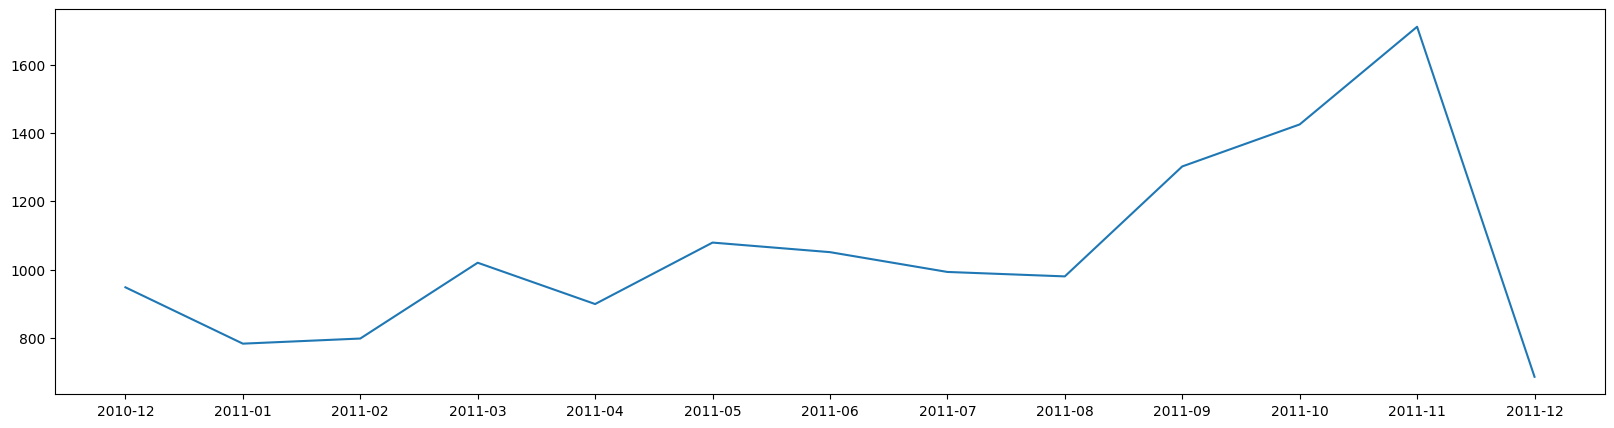

In [ ]:
# ▶ 기본 Lineplot 출력
import matplotlib.pyplot as plt
plt.plot(df.groupby('InvoiceDate')['CustomerID'].nunique());
plt.gcf().set_size_inches(20, 5)

# **35. PROC 문제**  
---

#**┗ ✅line plot 그리기 (2)**

## **🔒문제설명**
---
* **주어진 Data를 Read하고,조건에 맞는 데이터를 추출하고 그래프를 그리시오**

> **출력형태**

```
* 월별 구매한 유니크한 고객의 수를 계산
* 29번 문제 참고
* 상위 값을 구할 때 벌크 고객과 일반고객을 나누어 계산하고, 그래프를 하나의 영역에 각각 출력
```


In [ ]:
# ▶ Data read  (※ 추가 수정 없이, 상위 단계에서 경로 설정 후 실행)
import pandas as pd
import numpy as np
df = pd.read_csv('exam01.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## **🔑풀이설명**
---
> **문제풀이**



In [ ]:
# ▶ 조건에 맞게 bulk와 normal을 부여
df['buy_type'] = np.where(df['Quantity'] >=100, 'bulk', 'normal')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,buy_type
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,normal
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,normal
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,normal
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,normal
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,normal


In [ ]:
# ▶ 년월을 추출하기 위해 pd.to_datetime 명령어를 통해 InvoiceDate 컬럼을 시간형태 데이터 타입으로 변환
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate'] = df['InvoiceDate'].dt.strftime("%Y-%m") # 시간형태 데이터 타입에 적용할 수 있는 .dt.strftiem(포맷변경)를 적용하여 년월을 추출
df['InvoiceDate'].head()

0    2010-12
1    2010-12
2    2010-12
3    2010-12
4    2010-12
Name: InvoiceDate, dtype: object

In [ ]:
# ▶ ['InvoiceDate','buy_type'] 기준으로 데이터를 다시 집계
df3 = df.groupby(['InvoiceDate','buy_type'])['CustomerID'].nunique().reset_index()
df3.head()

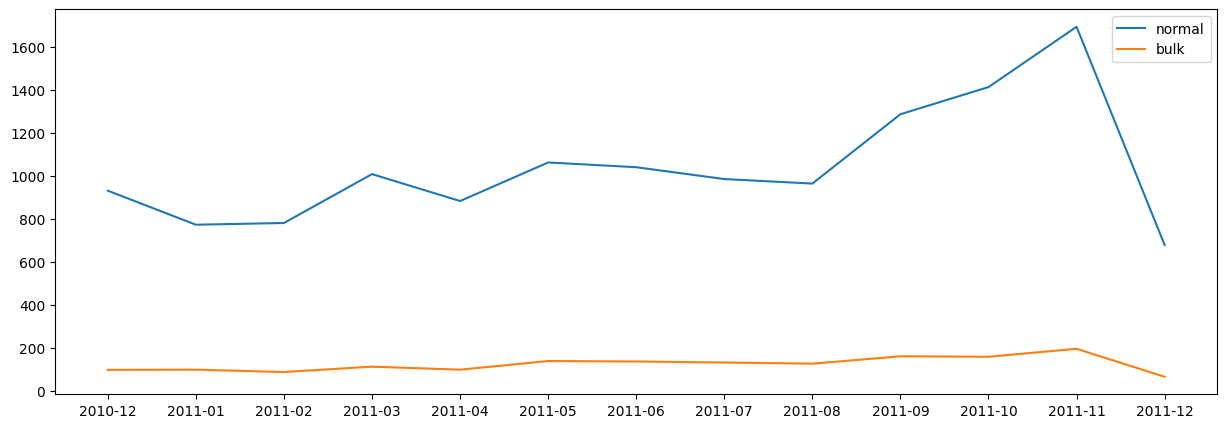

In [ ]:
# ▶ 2가지 조건을 각각 plot
plt.plot(df3[df3['buy_type']=='normal']['InvoiceDate'], df3[df3['buy_type']=='normal']['CustomerID'], label = 'normal')
plt.plot(df3[df3['buy_type']=='bulk']['InvoiceDate'], df3[df3['buy_type']=='bulk']['CustomerID'], label = 'bulk')
plt.legend()
plt.gcf().set_size_inches(15, 5)

# **36. PROC 문제**  
---

#**┗ ✅그래프 Color 변경**

## **🔒문제설명**
---
* **주어진 Data를 Read하고,조건에 맞는 데이터를 추출하고 그래프를 그리시오**

> **출력형태**

```
* 35번 문제와 동일한 데이터 활용하여, 그래프를 출력
* normal은 'pink', bulk는 'green'으로 표현하여 출력
```


In [ ]:
# ▶ Data read  (※ 추가 수정 없이, 상위 단계에서 경로 설정 후 실행)
import pandas as pd
import numpy as np
df = pd.read_csv('exam01.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## **🔑풀이설명**
---
> **문제풀이**



In [ ]:
# ▶ bulk, normal 부여
df['buy_type'] = np.where(df['Quantity'] >=100, 'bulk', 'normal')

# ▶ 년월을 추출하기 위해 pd.to_datetime 명령어를 통해 InvoiceDate 컬럼을 시간형태 데이터 타입으로 변환
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate'] = df['InvoiceDate'].dt.strftime("%Y-%m") # 시간형태 데이터 타입에 적용할 수 있는 .dt.strftiem(포맷변경)를 적용하여 년월을 추출

In [ ]:
df3 = df.groupby(['InvoiceDate','buy_type'])['CustomerID'].nunique().reset_index()

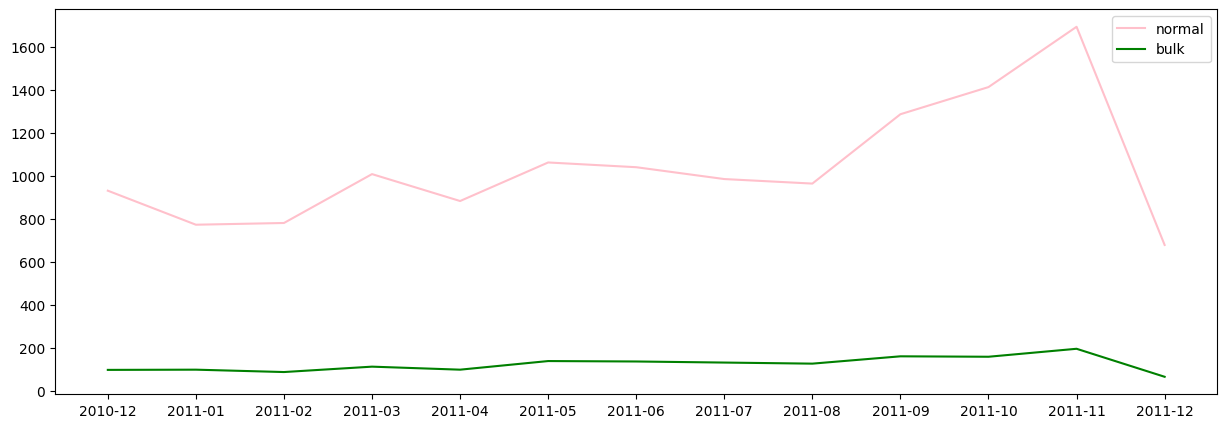

In [ ]:
# ▶ color 옵션을 통해 색상 부여 및 legned() 옵션을 통해 범례 출력
plt.plot(df3[df3['buy_type']=='normal']['InvoiceDate'], df3[df3['buy_type']=='normal']['CustomerID'], label = 'normal', color='pink')
plt.plot(df3[df3['buy_type']=='bulk']['InvoiceDate'], df3[df3['buy_type']=='bulk']['CustomerID'], label = 'bulk', color='green')
plt.legend()
plt.gcf().set_size_inches(15, 5)

# **37. PROC 문제**  
---

#**┗ ✅Catplot 그리기**

## **🔒문제설명**
---
* **주어진 Data를 Read하고, catplot을 활용하여 범주형 변수를 표현하시오**

> **출력형태**

```
* value_counts() 명령어를 사용하여 상위 Top10 국가에 대해 새로운 DF를 생성
* catplot을 활용하여 Country의 count를 표현
```


In [ ]:
# ▶ Data read  (※ 추가 수정 없이, 상위 단계에서 경로 설정 후 실행)
import pandas as pd
import numpy as np
df = pd.read_csv('exam01.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## **🔑풀이설명**
---
> **문제풀이**



In [ ]:
# ▶ value_counts() 명령어를 통해 가장 카운트가 많은 상위 10개의 국가를 필터링
df1 = pd.DataFrame(df['Country'].value_counts().head(10))
df1

,Country
United Kingdom,495478
Germany,9495
France,8557
EIRE,8196
Spain,2533
Netherlands,2371
Belgium,2069
Switzerland,2002
Portugal,1519
Australia,1259


In [ ]:
# ▶ 상위 10개의 국가를 리스트로 변경
list(df1.index)

['United Kingdom',
 'Germany',
 'France',
 'EIRE',
 'Spain',
 'Netherlands',
 'Belgium',
 'Switzerland',
 'Portugal',
 'Australia']

In [ ]:
# ▶ isin명려어를 통해 상위 10개의 국가의 데이터만 가져와서 df2를 생성
df2 = df[df['Country'].isin(list(df1.index))]

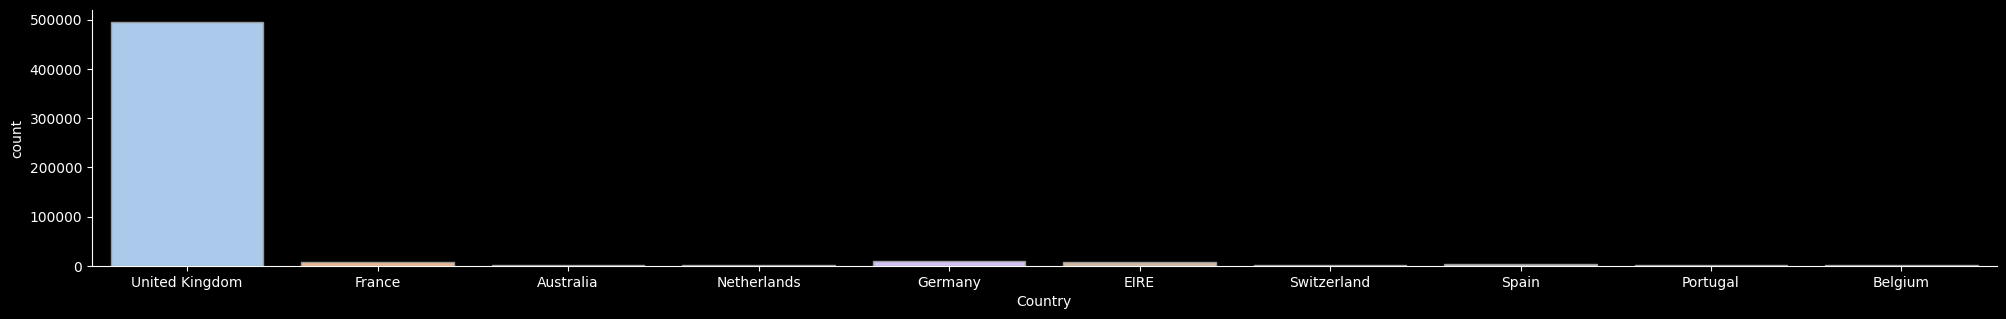

In [ ]:
# ▶ catplot 시각화
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

sns.catplot(x="Country", kind="count",palette="pastel", edgecolor=".6",data=df2);
plt.gcf().set_size_inches(25, 3)

# **39. PROC 문제**  
---

#**┗ ✅월별 구매수량 Boxplot 그리기**

## **🔒문제설명**
---
* **주어진 Data를 Read하고, Box-plot을 시각화하시오**

> **출력형태**

```
* 년월 변수를 추출하고, Quantity 대상으로 Boxplot 시각화
```


In [ ]:
# ▶ Data read  (※ 추가 수정 없이, 상위 단계에서 경로 설정 후 실행)
import pandas as pd
import numpy as np
df = pd.read_csv('exam01.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## **🔑풀이설명**
---
> **문제풀이**



In [ ]:
# ▶ 년월을 추출하기 위해 pd.to_datetime 명령어를 통해 InvoiceDate 컬럼을 시간형태 데이터 타입으로 변환
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate'] = df['InvoiceDate'].dt.strftime("%Y-%m") # 시간형태 데이터 타입에 적용할 수 있는 .dt.strftiem(포맷변경)를 적용하여 년월을 추출

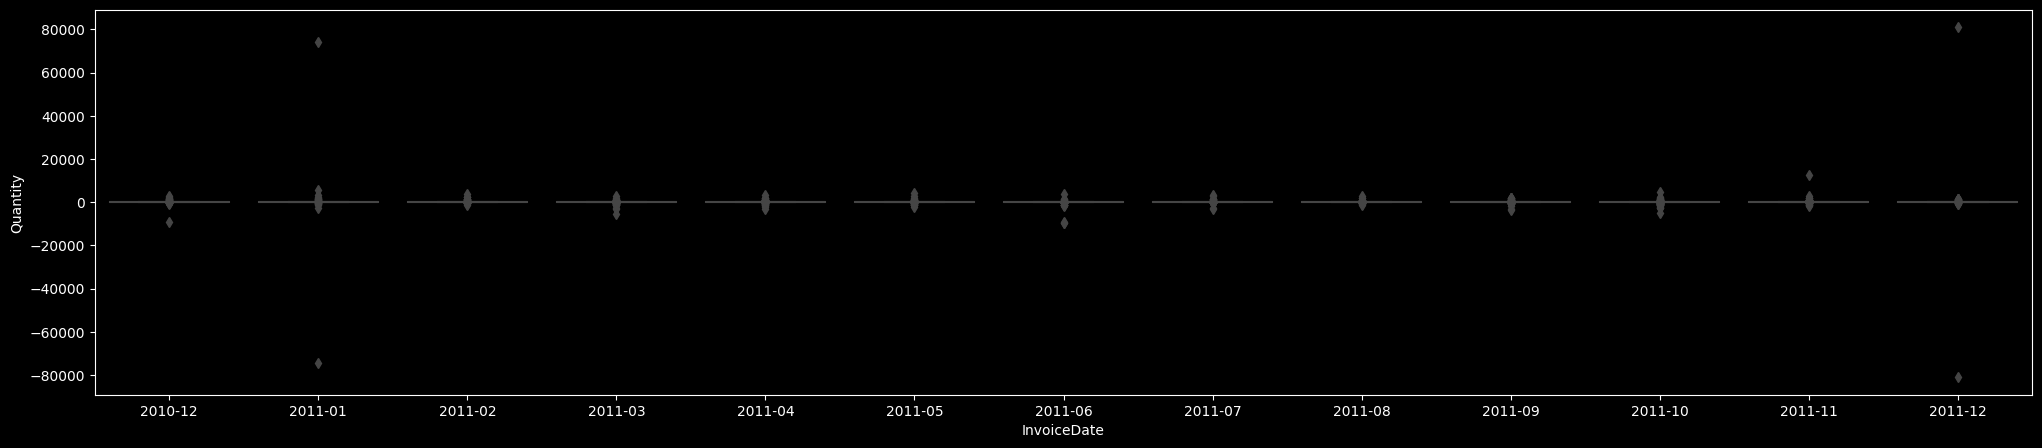

In [ ]:
# ▶ boxplot 명령어를 통해 시각화
sns.boxplot(x='InvoiceDate', y='Quantity', data= df)
plt.gcf().set_size_inches(25, 5)

# **40. PROC 문제**  
---

#**┗ ✅특정 값 포함한 행 찾기 (2)**

## **🔒문제설명**
---
* **주어진 Data를 Read하고, 다음 조건을 만족하는 데이터를 추출하시오**

> **출력형태**

```
* Description col에 'BOTTLE'과 'HANGER'가 포함된 모든 row를 출력
```


In [ ]:
# ▶ Data read  (※ 추가 수정 없이, 상위 단계에서 경로 설정 후 실행)
import pandas as pd
import numpy as np
df = pd.read_csv('exam01.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## **🔑풀이설명**
---
> **문제풀이**



In [ ]:
# ▶ str.contains를 사용하고, 문자열 입력시 '|' 연산자를 통해 2가지 이상의 문자열을 포함시킨 row를 찾을 수 있음
df[df['Description'].str.contains('BOTTLE|HANGER',na=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
51,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 9:02,2.75,17850.0,United Kingdom
61,536373,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 9:02,3.39,17850.0,United Kingdom
68,536375,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 9:32,2.75,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541751,581572,23328,SET 6 SCHOOL MILK BOTTLES IN CRATE,48,12/9/2011 12:08,3.39,16705.0,United Kingdom
541870,581585,22915,ASSORTED BOTTLE TOP MAGNETS,24,12/9/2011 12:31,0.19,15804.0,United Kingdom
541877,581585,22113,GREY HEART HOT WATER BOTTLE,4,12/9/2011 12:31,4.25,15804.0,United Kingdom
541878,581585,23356,LOVE HOT WATER BOTTLE,3,12/9/2011 12:31,5.95,15804.0,United Kingdom


# **41. PROC 문제**  
---

#**┗ ✅다양한 방법을 통해 컬럼 Select하기**

## **🔒문제설명**
---
* **주어진 Data를 Read하고, 특정 Col을 Select하시오**

> **출력형태**

```
* 원하는 방법 중 3가지 방법으로 다음 col을 추출
* InvoiceDate, CustomerID, Description
```


In [ ]:
# ▶ Data read  (※ 추가 수정 없이, 상위 단계에서 경로 설정 후 실행)
import pandas as pd
import numpy as np
df = pd.read_csv('exam01.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## **🔑풀이설명**
---
> **문제풀이**



In [ ]:
# ▶ (1) [[]] 방법
df1 = df[['InvoiceDate', 'CustomerID', 'Description']]
df1.head()

,InvoiceDate,CustomerID,Description
0,12/1/2010 8:26,17850.0,WHITE HANGING HEART T-LIGHT HOLDER
1,12/1/2010 8:26,17850.0,WHITE METAL LANTERN
2,12/1/2010 8:26,17850.0,CREAM CUPID HEARTS COAT HANGER
3,12/1/2010 8:26,17850.0,KNITTED UNION FLAG HOT WATER BOTTLE
4,12/1/2010 8:26,17850.0,RED WOOLLY HOTTIE WHITE HEART.


In [ ]:
# ▶ (2) drop 방법
df2 = df.drop(['InvoiceNo', 'StockCode', 'Quantity', 'UnitPrice', 'Country'], axis=1)
df2.head()

,Description,InvoiceDate,CustomerID
0,WHITE HANGING HEART T-LIGHT HOLDER,12/1/2010 8:26,17850.0
1,WHITE METAL LANTERN,12/1/2010 8:26,17850.0
2,CREAM CUPID HEARTS COAT HANGER,12/1/2010 8:26,17850.0
3,KNITTED UNION FLAG HOT WATER BOTTLE,12/1/2010 8:26,17850.0
4,RED WOOLLY HOTTIE WHITE HEART.,12/1/2010 8:26,17850.0


In [ ]:
# ▶ (3) filter 방법
df3 = df.filter(items=['InvoiceDate', 'CustomerID', 'Description'], axis=1)
df3.head()

,InvoiceDate,CustomerID,Description
0,12/1/2010 8:26,17850.0,WHITE HANGING HEART T-LIGHT HOLDER
1,12/1/2010 8:26,17850.0,WHITE METAL LANTERN
2,12/1/2010 8:26,17850.0,CREAM CUPID HEARTS COAT HANGER
3,12/1/2010 8:26,17850.0,KNITTED UNION FLAG HOT WATER BOTTLE
4,12/1/2010 8:26,17850.0,RED WOOLLY HOTTIE WHITE HEART.


# **42. PROC 문제**  
---

#**┗ ✅그래프에 수평,수직선 추가하기**

## **🔒문제설명**
---
* **주어진 Data를 Read하고,조건에 맞는 데이터를 추출하고 시각화하시오**

> **출력형태**

```
* 년월별 유니크한 고객 수를 추출
* 모든 년월의 평균 구매 고객수의 값을 수평선으로 표현
```


In [ ]:
# ▶ Data read  (※ 추가 수정 없이, 상위 단계에서 경로 설정 후 실행)
import pandas as pd
import numpy as np
df = pd.read_csv('exam01.csv', encoding='ISO-8859-1')
df.head()

## **🔑풀이설명**
---
> **문제풀이**



In [ ]:
# ▶ 년월을 추출하기 위해 pd.to_datetime 명령어를 통해 InvoiceDate 컬럼을 시간형태 데이터 타입으로 변환
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate'] = df['InvoiceDate'].dt.strftime("%Y-%m") # 시간형태 데이터 타입에 적용할 수 있는 .dt.strftiem(포맷변경)를 적용하여 년월을 추출
df['InvoiceDate'].head()

0    2010-12
1    2010-12
2    2010-12
3    2010-12
4    2010-12
Name: InvoiceDate, dtype: object

In [ ]:
# ▶ 년월별 구매한 고객 수(Unique)
df.groupby('InvoiceDate')['CustomerID'].nunique()

InvoiceDate
2010-12     948
2011-01     783
2011-02     798
2011-03    1020
2011-04     899
2011-05    1079
2011-06    1051
2011-07     993
2011-08     980
2011-09    1302
2011-10    1425
2011-11    1711
2011-12     686
Name: CustomerID, dtype: int64

In [ ]:
# ▶ 수평선을 그리기 위한 값 선정
df.groupby('InvoiceDate')['CustomerID'].nunique().mean()

1051.923076923077

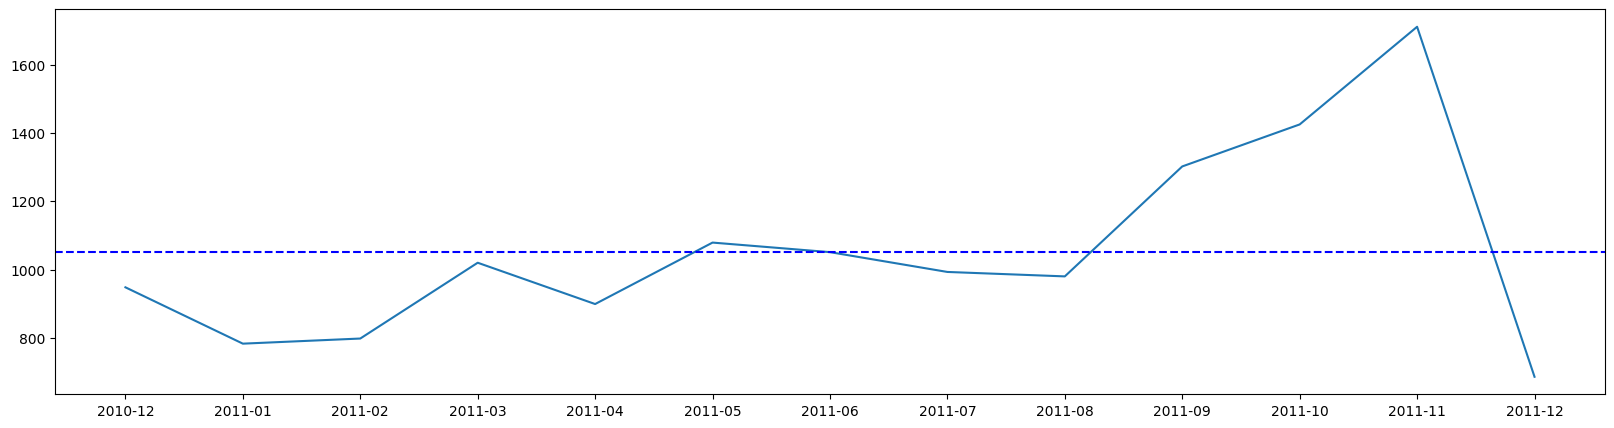

In [ ]:
import matplotlib.pyplot as plt
# ▶ plot을 그리고, axhline 명령어를 통해 수평선 추가, 수평선 값은 상위 단계에서 구한 평균값을 활용
# xmin=0, xmax=1로 설정할 시 그래프의 처음부터 끝까지 수평선이 추가됨
plt.plot(df.groupby('InvoiceDate')['CustomerID'].nunique());
plt.axhline(y=df.groupby('InvoiceDate')['CustomerID'].nunique().mean(), xmin=0, xmax=1, color='blue', linestyle='dashed')
plt.gcf().set_size_inches(20, 5)

# **43. PROC 문제**  
---

#**┗ ✅축 이름 설정**

## **🔒문제설명**
---
* **주어진 Data를 Read하고, 조건에 데이터를 추출하고 시각화하시오**

> **출력형태**

```
* 42번문제와 동일한 데이터를 사용하고, x축과 y축에 레이블을 입력
* x축 : 'BSYM' / y축 : 'MAU'
```


In [ ]:
# ▶ Data read  (※ 추가 수정 없이, 상위 단계에서 경로 설정 후 실행)
import pandas as pd
import numpy as np
df = pd.read_csv('exam01.csv', encoding='ISO-8859-1')
df.head()

## **🔑풀이설명**
---
> **문제풀이**



In [ ]:
# ▶ 년월을 추출하기 위해 pd.to_datetime 명령어를 통해 InvoiceDate 컬럼을 시간형태 데이터 타입으로 변환
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate'] = df['InvoiceDate'].dt.strftime("%Y-%m") # 시간형태 데이터 타입에 적용할 수 있는 .dt.strftiem(포맷변경)를 적용하여 년월을 추출
df['InvoiceDate'].head()

0    2010-12
1    2010-12
2    2010-12
3    2010-12
4    2010-12
Name: InvoiceDate, dtype: object

In [ ]:
# ▶ 년월별 구매한 고객 수(Unique)
df.groupby('InvoiceDate')['CustomerID'].nunique()

InvoiceDate
2010-12     948
2011-01     783
2011-02     798
2011-03    1020
2011-04     899
2011-05    1079
2011-06    1051
2011-07     993
2011-08     980
2011-09    1302
2011-10    1425
2011-11    1711
2011-12     686
Name: CustomerID, dtype: int64

In [ ]:
# ▶ 수평선을 그리기 위한 값 선정
df.groupby('InvoiceDate')['CustomerID'].nunique().mean()

1051.923076923077

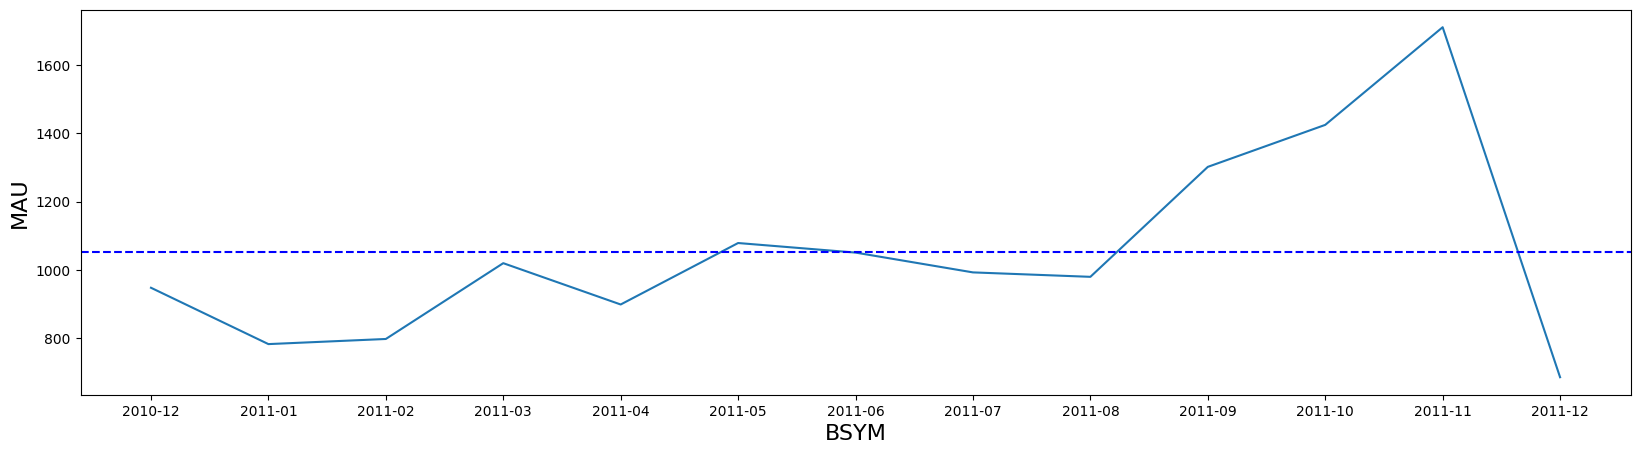

In [ ]:
import matplotlib.pyplot as plt
# ▶ plot을 그리고, axhline 명령어를 통해 수평선 추가, 수평선 값은 상위 단계에서 구한 평균값을 활용
# xmin=0, xmax=1로 설정할 시 그래프의 처음부터 끝까지 수평선이 추가됨
plt.plot(df.groupby('InvoiceDate')['CustomerID'].nunique());
plt.axhline(y=df.groupby('InvoiceDate')['CustomerID'].nunique().mean(), xmin=0, xmax=1, color='blue', linestyle='dashed')
plt.xlabel('BSYM', fontsize=16) # xlabel 이름 설정
plt.ylabel('MAU', fontsize=16) # ylabel 이름 설정
plt.gcf().set_size_inches(20, 5)

# **44. PROC 문제**  
---

#**┗ ✅이중축 그래프 그리기**

## **🔒문제설명**
---
* **주어진 Data를 Read하고, 조건에 맞는 데이터를 추출하고 시각화하시오**

> **출력형태**

```
* 월별 유니크한 구매 고객수(MAU)를 추출
* 월별 객단가(Total 구매 금액 / MAU) 추출
* 상위 2개의 데이터를 활용하여 이중축 그래프 출력
```


In [ ]:
# ▶ Data read  (※ 추가 수정 없이, 상위 단계에서 경로 설정 후 실행)
import pandas as pd
import numpy as np
df = pd.read_csv('exam01.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## **🔑풀이설명**
---
> **문제풀이**



In [ ]:
# ▶ 년월을 추출하기 위해 pd.to_datetime 명령어를 통해 InvoiceDate 컬럼을 시간형태 데이터 타입으로 변환
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate'] = df['InvoiceDate'].dt.strftime("%Y-%m") # 시간형태 데이터 타입에 적용할 수 있는 .dt.strftiem(포맷변경)를 적용하여 년월을 추출
df['InvoiceDate'].head()

0    2010-12
1    2010-12
2    2010-12
3    2010-12
4    2010-12
Name: InvoiceDate, dtype: object

In [ ]:
# ▶ 국가별 유니크한 고객ID를 집계하여 df1에 할당
df1 = df.groupby('InvoiceDate')['CustomerID'].nunique()
df1

InvoiceDate
2010-12     948
2011-01     783
2011-02     798
2011-03    1020
2011-04     899
2011-05    1079
2011-06    1051
2011-07     993
2011-08     980
2011-09    1302
2011-10    1425
2011-11    1711
2011-12     686
Name: CustomerID, dtype: int64

In [ ]:
# ▶ UnitPrice와 Quantity를 곱하여 Amt Col을 생성하고, 국가별 Amt를 집계하여 df2에 할당
df['Amt'] = df['UnitPrice'] * df['Quantity']
df2 = df.groupby('InvoiceDate')['Amt'].sum()
df2

InvoiceDate
2010-12     748957.020
2011-01     560000.260
2011-02     498062.650
2011-03     683267.080
2011-04     493207.121
2011-05     723333.510
2011-06     691123.120
2011-07     681300.111
2011-08     682680.510
2011-09    1019687.622
2011-10    1070704.670
2011-11    1461756.250
2011-12     433668.010
Name: Amt, dtype: float64

In [ ]:
# ▶ df1과 df2를 열 기준으로 Concat하고, Amt를 CustomerID로 나누어 국가별 객단가를 산출함
df3 = pd.concat([df1,df2], axis=1)
df3['CustomerTransaction'] = df3['Amt'] / df3['CustomerID']
df3

,CustomerID,Amt,CustomerTransaction
InvoiceDate,,,
2010-12,948,748957.020,790.039051
2011-01,783,560000.260,715.198289
2011-02,798,498062.650,624.138659
2011-03,1020,683267.080,669.869686
2011-04,899,493207.121,548.617487
2011-05,1079,723333.510,670.373967
2011-06,1051,691123.120,657.586223
2011-07,993,681300.111,686.102831
2011-08,980,682680.510,696.612765


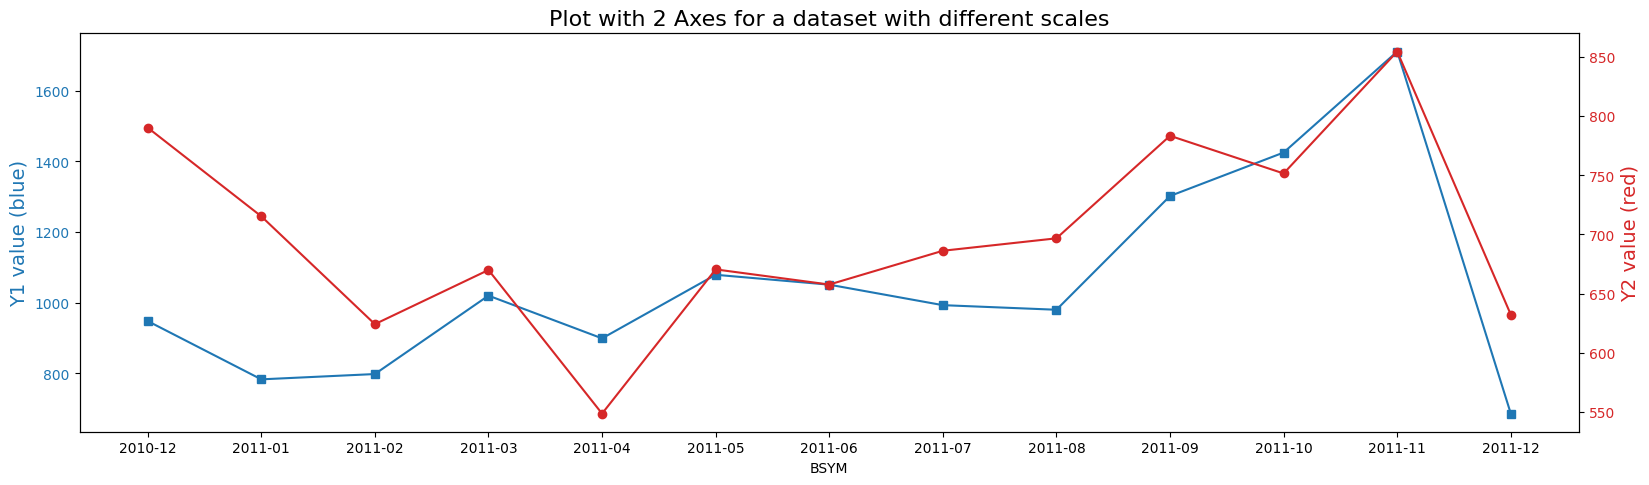

In [ ]:
# ▶ 이중축 그래프
fig, ax1 = plt.subplots()
color_1 = 'tab:blue' # 색상
ax1.set_title('Plot with 2 Axes for a dataset with different scales', fontsize=16) # 제목
ax1.set_xlabel('BSYM') # x label
ax1.set_ylabel('Y1 value (blue)', fontsize=14, color=color_1) # y label
ax1.plot(df3.index, df3['CustomerID'], marker='s', color=color_1) # line plot
ax1.tick_params(axis='y', labelcolor=color_1) # ticker paramter 선언


ax2 = ax1.twinx() # 이중 축
color_2 = 'tab:red' # 색상
ax2.set_ylabel('Y2 value (red)', fontsize=14, color=color_2) # y label
ax2.plot(df3.index, df3['CustomerTransaction'], marker='o', color=color_2) # line plot
ax2.tick_params(axis='y', labelcolor=color_2) # ticker paramter 선언

fig.tight_layout()
plt.gcf().set_size_inches(20, 5)
plt.show()


# **45. PROC 문제**  
---

#**┗ ✅산점도 그리기**

## **🔒문제설명**
---
* **주어진 Data를 Read하고, 주어진 조건에 맞게 데이터를 추출하고 그래프를 시각화하시오**

> **출력형태**

```
* 44번 동일 데이터셋 사용
* CustomerID와 CustomerTransaction을 활용하여 산점도를 출력
```


In [ ]:
# ▶ Data read  (※ 추가 수정 없이, 상위 단계에서 경로 설정 후 실행)
import pandas as pd
import numpy as np
df = pd.read_csv('exam01.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## **🔑풀이설명**
---
> **문제풀이**



In [ ]:
# ▶ 년월을 추출하기 위해 pd.to_datetime 명령어를 통해 InvoiceDate 컬럼을 시간형태 데이터 타입으로 변환
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate'] = df['InvoiceDate'].dt.strftime("%Y-%m") # 시간형태 데이터 타입에 적용할 수 있는 .dt.strftiem(포맷변경)를 적용하여 년월을 추출
df['InvoiceDate'].head()

0    2010-12
1    2010-12
2    2010-12
3    2010-12
4    2010-12
Name: InvoiceDate, dtype: object

In [ ]:
# ▶ 국가별 유니크한 고객ID를 집계하여 df1에 할당
df1 = df.groupby('InvoiceDate')['CustomerID'].nunique()
df1

InvoiceDate
2010-12     948
2011-01     783
2011-02     798
2011-03    1020
2011-04     899
2011-05    1079
2011-06    1051
2011-07     993
2011-08     980
2011-09    1302
2011-10    1425
2011-11    1711
2011-12     686
Name: CustomerID, dtype: int64

In [ ]:
# ▶ UnitPrice와 Quantity를 곱하여 Amt Col을 생성하고, 국가별 Amt를 집계하여 df2에 할당
df['Amt'] = df['UnitPrice'] * df['Quantity']
df2 = df.groupby('InvoiceDate')['Amt'].sum()
df2

InvoiceDate
2010-12     748957.020
2011-01     560000.260
2011-02     498062.650
2011-03     683267.080
2011-04     493207.121
2011-05     723333.510
2011-06     691123.120
2011-07     681300.111
2011-08     682680.510
2011-09    1019687.622
2011-10    1070704.670
2011-11    1461756.250
2011-12     433668.010
Name: Amt, dtype: float64

In [ ]:
# ▶ df1과 df2를 열 기준으로 Concat하고, Amt를 CustomerID로 나누어 국가별 객단가를 산출함
df3 = pd.concat([df1,df2], axis=1)
df3['CustomerTransaction'] = df3['Amt'] / df3['CustomerID']
df3

,CustomerID,Amt,CustomerTransaction
InvoiceDate,,,
2010-12,948,748957.020,790.039051
2011-01,783,560000.260,715.198289
2011-02,798,498062.650,624.138659
2011-03,1020,683267.080,669.869686
2011-04,899,493207.121,548.617487
2011-05,1079,723333.510,670.373967
2011-06,1051,691123.120,657.586223
2011-07,993,681300.111,686.102831
2011-08,980,682680.510,696.612765


<Axes: xlabel='CustomerID', ylabel='CustomerTransaction'>

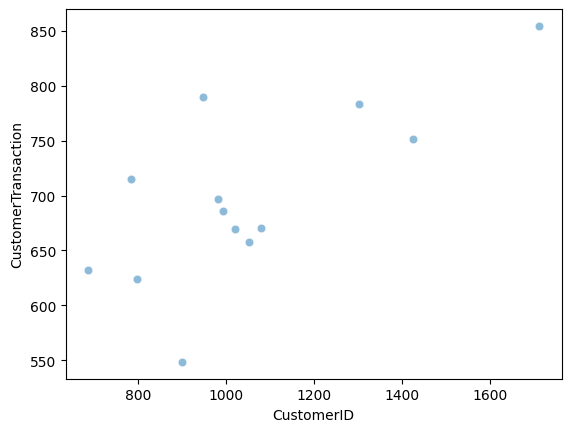

In [ ]:
# ▶ sns scatterplot을 활용하여 그래프를 출력
import seaborn as sns
sns.scatterplot(x='CustomerID', y='CustomerTransaction', alpha=0.5, data=df3)

# **46. PROC 문제**  
---

#**┗ ✅plotly 활용 bar 그래프 그리기**

## **🔒문제설명**
---
* **주어진 Data를 Read하고, 조건에 맞게 데이터를 출력하고 시각화하시오**

> **출력형태**

```
* 46번 동일 데이터 사용
* Plotly 라이브러리를 활용하여 년월별 MAU를 Bar 그래프로 출력
```


In [ ]:
# ▶ Data read  (※ 추가 수정 없이, 상위 단계에서 경로 설정 후 실행)
import pandas as pd
import numpy as np
df = pd.read_csv('exam01.csv', encoding='ISO-8859-1')
df.head()

## **🔑풀이설명**
---
> **문제풀이**



In [ ]:
# ▶ 년월을 추출하기 위해 pd.to_datetime 명령어를 통해 InvoiceDate 컬럼을 시간형태 데이터 타입으로 변환
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate'] = df['InvoiceDate'].dt.strftime("%Y-%m") # 시간형태 데이터 타입에 적용할 수 있는 .dt.strftiem(포맷변경)를 적용하여 년월을 추출
df['InvoiceDate'].head()

0    2010-12
1    2010-12
2    2010-12
3    2010-12
4    2010-12
Name: InvoiceDate, dtype: object

In [ ]:
# ▶ 국가별 유니크한 고객ID를 집계하여 df1에 할당
df1 = df.groupby('InvoiceDate')['CustomerID'].nunique()
df1

InvoiceDate
2010-12     948
2011-01     783
2011-02     798
2011-03    1020
2011-04     899
2011-05    1079
2011-06    1051
2011-07     993
2011-08     980
2011-09    1302
2011-10    1425
2011-11    1711
2011-12     686
Name: CustomerID, dtype: int64

In [ ]:
# ▶ UnitPrice와 Quantity를 곱하여 Amt Col을 생성하고, 국가별 Amt를 집계하여 df2에 할당
df['Amt'] = df['UnitPrice'] * df['Quantity']
df2 = df.groupby('InvoiceDate')['Amt'].sum()
df2

InvoiceDate
2010-12     748957.020
2011-01     560000.260
2011-02     498062.650
2011-03     683267.080
2011-04     493207.121
2011-05     723333.510
2011-06     691123.120
2011-07     681300.111
2011-08     682680.510
2011-09    1019687.622
2011-10    1070704.670
2011-11    1461756.250
2011-12     433668.010
Name: Amt, dtype: float64

In [ ]:
# ▶ df1과 df2를 열 기준으로 Concat하고, Amt를 CustomerID로 나누어 국가별 객단가를 산출함
df3 = pd.concat([df1,df2], axis=1)
df3['CustomerTransaction'] = df3['Amt'] / df3['CustomerID']
df3

,CustomerID,Amt,CustomerTransaction
InvoiceDate,,,
2010-12,948,748957.020,790.039051
2011-01,783,560000.260,715.198289
2011-02,798,498062.650,624.138659
2011-03,1020,683267.080,669.869686
2011-04,899,493207.121,548.617487
2011-05,1079,723333.510,670.373967
2011-06,1051,691123.120,657.586223
2011-07,993,681300.111,686.102831
2011-08,980,682680.510,696.612765


In [ ]:
# ▶ plotly package를 load하고, px.bar 명령어를 통해 시각화
# fig.update_layout 옵션을 통해 크기를 조절할 수 있음
import plotly.express as px
fig = px.bar(df3['CustomerID'])
fig.update_layout(height=300 , width=600)
fig.show()

# **47. PROC 문제**  
---

#**┗ ✅테이블 데이터 그라데이션 표현**

## **🔒문제설명**
---
* **주어진 Data를 Read하고,조건에 맞게 데이터를 출력하고 시각화하시오**

> **출력형태**

```
* 46번 동일 데이터셋 활용
* style.background_gradient 활용하여 시각화 표현
```


In [ ]:
# ▶ Data read  (※ 추가 수정 없이, 상위 단계에서 경로 설정 후 실행)
import pandas as pd
import numpy as np
df = pd.read_csv('exam01.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## **🔑풀이설명**
---
> **문제풀이**



In [ ]:
# ▶ 년월을 추출하기 위해 pd.to_datetime 명령어를 통해 InvoiceDate 컬럼을 시간형태 데이터 타입으로 변환
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate'] = df['InvoiceDate'].dt.strftime("%Y-%m") # 시간형태 데이터 타입에 적용할 수 있는 .dt.strftiem(포맷변경)를 적용하여 년월을 추출
df['InvoiceDate'].head()

0    2010-12
1    2010-12
2    2010-12
3    2010-12
4    2010-12
Name: InvoiceDate, dtype: object

In [ ]:
# ▶ 국가별 유니크한 고객ID를 집계하여 df1에 할당
df1 = df.groupby('InvoiceDate')['CustomerID'].nunique()
df1

InvoiceDate
2010-12     948
2011-01     783
2011-02     798
2011-03    1020
2011-04     899
2011-05    1079
2011-06    1051
2011-07     993
2011-08     980
2011-09    1302
2011-10    1425
2011-11    1711
2011-12     686
Name: CustomerID, dtype: int64

In [ ]:
# ▶ UnitPrice와 Quantity를 곱하여 Amt Col을 생성하고, 국가별 Amt를 집계하여 df2에 할당
df['Amt'] = df['UnitPrice'] * df['Quantity']
df2 = df.groupby('InvoiceDate')['Amt'].sum()
df2

InvoiceDate
2010-12     748957.020
2011-01     560000.260
2011-02     498062.650
2011-03     683267.080
2011-04     493207.121
2011-05     723333.510
2011-06     691123.120
2011-07     681300.111
2011-08     682680.510
2011-09    1019687.622
2011-10    1070704.670
2011-11    1461756.250
2011-12     433668.010
Name: Amt, dtype: float64

In [ ]:
# ▶ df1과 df2를 열 기준으로 Concat하고, Amt를 CustomerID로 나누어 국가별 객단가를 산출함
df3 = pd.concat([df1,df2], axis=1)
df3['CustomerTransaction'] = df3['Amt'] / df3['CustomerID']
df3

,CustomerID,Amt,CustomerTransaction
InvoiceDate,,,
2010-12,948,748957.020,790.039051
2011-01,783,560000.260,715.198289
2011-02,798,498062.650,624.138659
2011-03,1020,683267.080,669.869686
2011-04,899,493207.121,548.617487
2011-05,1079,723333.510,670.373967
2011-06,1051,691123.120,657.586223
2011-07,993,681300.111,686.102831
2011-08,980,682680.510,696.612765


In [ ]:
# ▶ style.background_gradient를 사용하여 히트맵 차트 표현
# axis 옵션에 따라 히트맵의 적용 범위가 달라짐
# axis = 0 : 행 기준
# axis = 1 :열 기준
# axis = None : 모든 데이터
df3.style.background_gradient(cmap='coolwarm', low=1, axis=0)

,CustomerID,Amt,CustomerTransaction
InvoiceDate,,,
2010-12,948,748957.020000,790.039051
2011-01,783,560000.260000,715.198289
2011-02,798,498062.650000,624.138659
2011-03,1020,683267.080000,669.869686
2011-04,899,493207.121000,548.617487
2011-05,1079,723333.510000,670.373967
2011-06,1051,691123.120000,657.586223
2011-07,993,681300.111000,686.102831
2011-08,980,682680.510000,696.612765


# **48. PROC 문제**  
---

#**┗ ✅이중 조건문**

## **🔒문제설명**
---
* **주어진 Data를 Read하고,이중 조건문을 활용하여 구분자를 생성하시오**

> **출력형태**

```
* Country가 United Kingdom인 경우 'UK', Germany인 경우 'GR' 그 밖에 'etc'로 처리
```


In [ ]:
# ▶ Data read  (※ 추가 수정 없이, 상위 단계에서 경로 설정 후 실행)
import pandas as pd
import numpy as np
df = pd.read_csv('exam01.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## **🔑풀이설명**
---
> **문제풀이**



In [ ]:
# ▶ Value_counts()를 통해 현재 구성되어 있는 국가 데이터 확인
df['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [ ]:
# ▶ np.where을 두번 사용하여 이중 조건문 완성
df['Country'] = np.where(df['Country']=='United Kingdom', 'UK',
                         np.where(df['Country']=='Germany', 'GR', 'etc')
                         )
df['Country'].value_counts()

UK     495478
etc     36936
GR       9495
Name: Country, dtype: int64

# **49. PROC 문제**  
---

#**┗ ✅데이터 가공 및 추출 (1)**

## **🔒문제설명**
---
* **주어진 Data를 Read하고, 주어진 조건에 맞는 데이터를 추출하시오**

> **출력형태**

```
* Country별 객단가(CustomerTransaction)을 추출
* CustomerTransaction = Total amt / MAU
* 46번 문제 참고
```


In [ ]:
# ▶ Data read  (※ 추가 수정 없이, 상위 단계에서 경로 설정 후 실행)
import pandas as pd
import numpy as np
df = pd.read_csv('exam01.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## **🔑풀이설명**
---
> **문제풀이**



In [ ]:
# ▶ UnitPrice와 Quantity를 곱하여 Amt Col 생성
df['Amt'] = df['UnitPrice'] * df['Quantity']

In [ ]:
# ▶ 국가별 유니크한 고객ID를 집계하여 df1에 할당하고, 국가별 Amt를 집계하여 df2에 할당
df1 = df.groupby('Country')['CustomerID'].nunique()
df2 = df.groupby('Country')['Amt'].sum()

In [ ]:
# ▶ df1과 df2를 열 기준으로 Concat하고, Amt를 CustomerID로 나누어 국가별 객단가를 산출함
df3 = pd.concat([df1,df2], axis=1)
df3['CustomerTransaction'] = df3['Amt'] / df3['CustomerID']
df3

,CustomerID,Amt,CustomerTransaction
Country,,,
Australia,9,137077.270,1.523081e+04
Austria,11,10154.320,9.231200e+02
Bahrain,2,548.400,2.742000e+02
Belgium,25,40910.960,1.636438e+03
Brazil,1,1143.600,1.143600e+03
Canada,4,3666.380,9.165950e+02
Channel Islands,9,20086.290,2.231810e+03
Cyprus,8,12946.290,1.618286e+03
Czech Republic,1,707.720,7.077200e+02


# **50. PROC 문제**  
---

#**┗ ✅데이터 가공 및 추출 (2)**

## **🔒문제설명**
---
* **주어진 Data를 Read하고, 조건에 맞게 데이터를 추출하시오**

> **출력형태**

```
* 49번 문제에서 inf(무한대)로 표현된 데이터를 0으로 처리
```


In [ ]:
# ▶ Data read  (※ 추가 수정 없이, 상위 단계에서 경로 설정 후 실행)
import pandas as pd
import numpy as np
df = pd.read_csv('exam01.csv', encoding='ISO-8859-1')
df.head()

## **🔑풀이설명**
---
> **문제풀이**



In [ ]:
# ▶ UnitPrice와 Quantity를 곱하여 Amt Col 생성
df['Amt'] = df['UnitPrice'] * df['Quantity']

In [ ]:
# ▶ 국가별 유니크한 고객ID를 집계하여 df1에 할당하고, 국가별 Amt를 집계하여 df2에 할당
df1 = df.groupby('Country')['CustomerID'].nunique()
df2 = df.groupby('Country')['Amt'].sum()

In [ ]:
# ▶ df1과 df2를 열 기준으로 Concat하고, Amt를 CustomerID로 나누어 국가별 객단가를 산출함
df3 = pd.concat([df1,df2], axis=1)
df3['CustomerTransaction'] = df3['Amt'] / df3['CustomerID']
df3

,CustomerID,Amt,CustomerTransaction
Country,,,
Australia,9,137077.270,1.523081e+04
Austria,11,10154.320,9.231200e+02
Bahrain,2,548.400,2.742000e+02
Belgium,25,40910.960,1.636438e+03
Brazil,1,1143.600,1.143600e+03
Canada,4,3666.380,9.165950e+02
Channel Islands,9,20086.290,2.231810e+03
Cyprus,8,12946.290,1.618286e+03
Czech Republic,1,707.720,7.077200e+02


In [ ]:
# ▶ inf로 선언된 값을 변경하기 위해 replace 명령어를 사용하여 np.inf를 0으로 변환
df3['CustomerTransaction'] = df3['CustomerTransaction'].replace(np.inf, 0)

In [ ]:
# ▶ 변환된 데이터 셋 확인
df3

,CustomerID,Amt,CustomerTransaction
Country,,,
Australia,9,137077.270,15230.807778
Austria,11,10154.320,923.120000
Bahrain,2,548.400,274.200000
Belgium,25,40910.960,1636.438400
Brazil,1,1143.600,1143.600000
Canada,4,3666.380,916.595000
Channel Islands,9,20086.290,2231.810000
Cyprus,8,12946.290,1618.286250
Czech Republic,1,707.720,707.720000
